In [12]:
pip install uxsim

simulation setting:
 scenario name: 
 simulation duration:	 1200 s
 number of vehicles:	 810 veh
 total road length:	 3000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 240
 number of platoons:	 162
 number of links:	 3
 number of nodes:	 4
 setup time:		 0.02 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      130 vehs|  13.8 m/s|     0.06 s
    1195 s|       75 vehs|  13.0 m/s|     0.11 s
 simulation finished
results:
 average speed:	 11.7 m/s
 number of completed trips:	 735 / 810
 average travel time of trips:	 162.6 s
 average delay of trips:	 62.6 s
 delay ratio:			 0.385
 total distance traveled:	 1632250.0 m


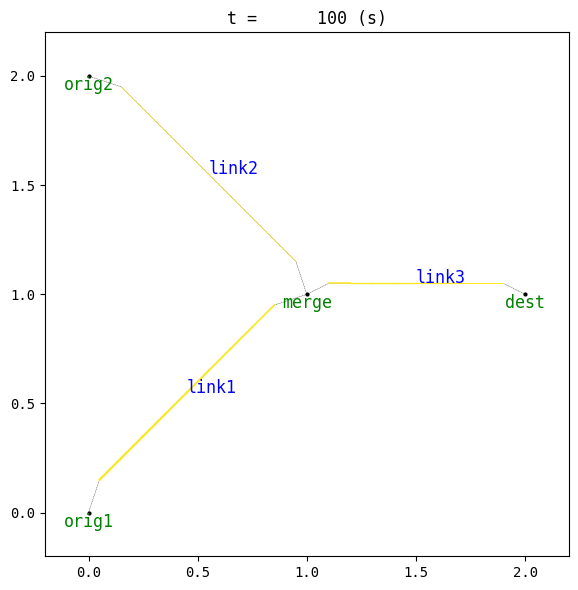

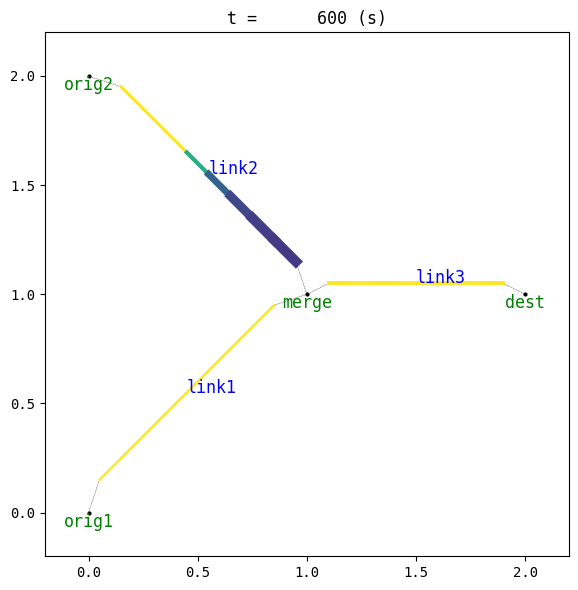

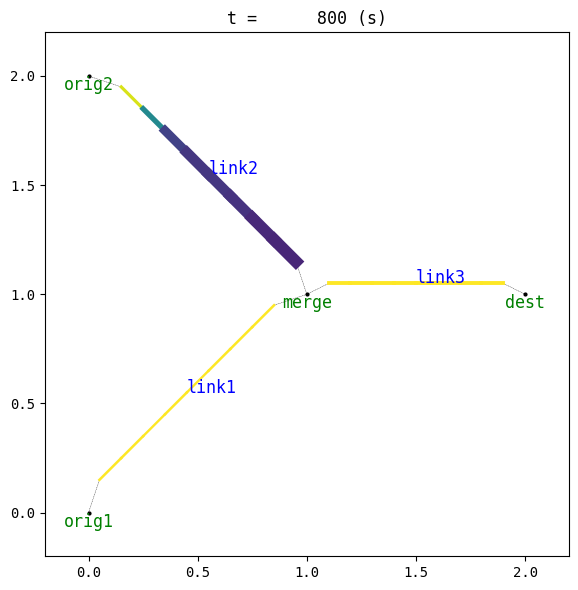

In [13]:
from uxsim import *

# Define the main simulation
# Units are standardized to seconds (s) and meters (m)
W = World(
    name="",    # Scenario name
    deltan=5,   # Simulation aggregation unit delta n
    tmax=1200,  # Total simulation time (s)
    print_mode=1, save_mode=1, show_mode=1,    # Various options
    random_seed=0    # Set the random seed
)

# Define the scenario
## Create nodes
W.addNode(name="orig1", x=0, y=0)
W.addNode("orig2", 0, 2)
W.addNode("merge", 1, 1)
W.addNode("dest", 2, 1)
## Create links between nodes
W.addLink(name="link1", start_node="orig1", end_node="merge",
          length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("link2", "orig2", "merge", length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("link3", "merge", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)
## Create OD traffic demand between nodes
W.adddemand(orig="orig1", dest="dest", t_start=0, t_end=1000, flow=0.45)
W.adddemand("orig2", "dest", 400, 1000, 0.6)

# Run the simulation to the end
W.exec_simulation()

# Print summary of simulation result
W.analyzer.print_simple_stats()

# Visualize snapshots of network traffic state for several timesteps
W.analyzer.network(100, detailed=1, network_font_size=12)
W.analyzer.network(600, detailed=1, network_font_size=12)
W.analyzer.network(800, detailed=1, network_font_size=12)

In [14]:
!pip install pygame numpy

!apt-get install -y python3-pygame xvfb
!pip install pyvirtualdisplay pygame
!pip install pyvirtualdisplay pygame


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-freefont-ttf libfluidsynth3 libfontenc1 libinstpatch-1.0-2 libmodplug1 libopusfile0
  libportmidi0 libsdl2-image-2.0-0 libsdl2-mixer-2.0-0 libsdl2-ttf-2.0-0 libxfont2 libxkbfile1
  python3-numpy timgm6mb-soundfont x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
Suggested packages:
  python-numpy-doc python3-pytest python-pygame-doc timidity fluid-soundfont-gm
The following NEW packages will be installed:
  fonts-freefont-ttf libfluidsynth3 libfontenc1 libinstpatch-1.0-2 libmodplug1 libopusfile0
  libportmidi0 libsdl2-image-2.0-0 libsdl2-mixer-2.0-0 libsdl2-ttf-2.0-0 libxfont2 libxkbfile1
  python3-numpy python3-pygame timgm6mb-soundfont x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 21 newly installed, 0 to remove and 18 not upgraded.
Need to get 21.1 MB of archiv

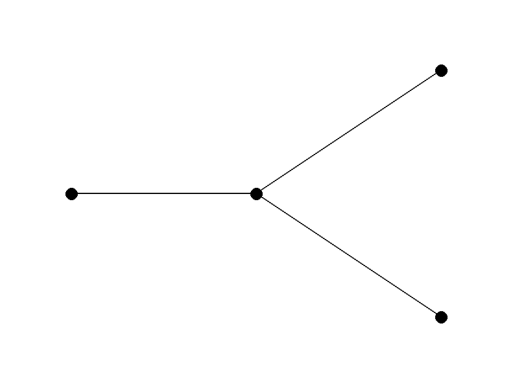

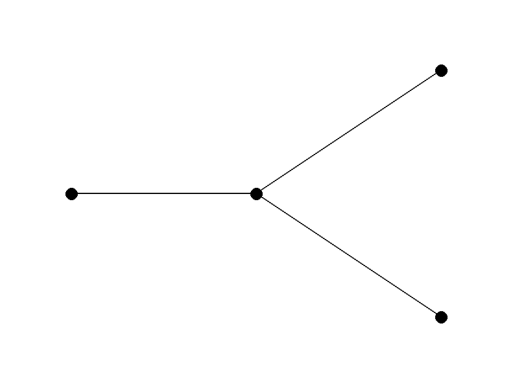

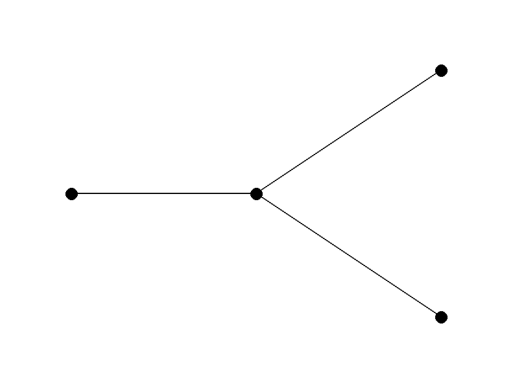

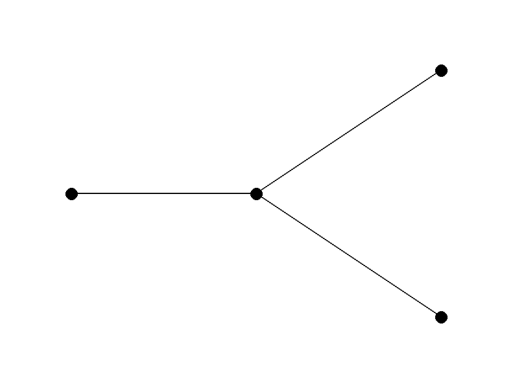

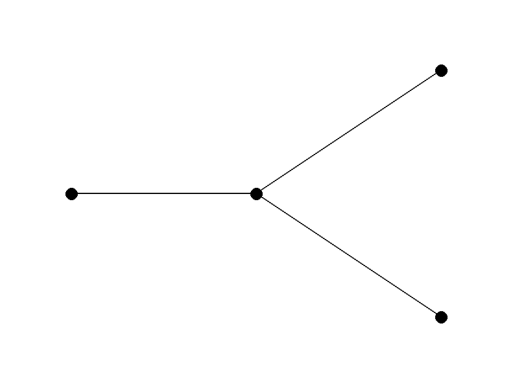

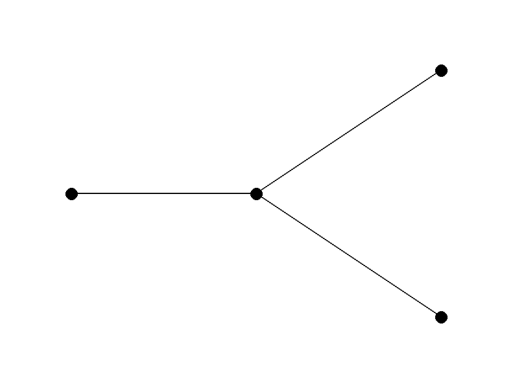

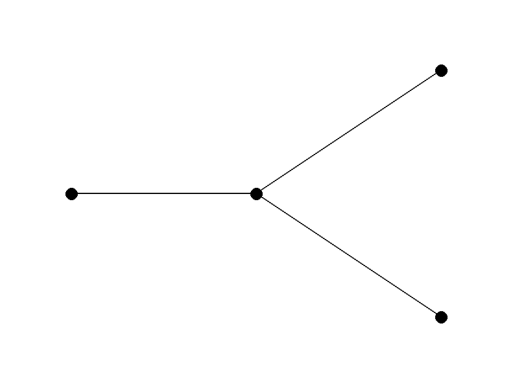

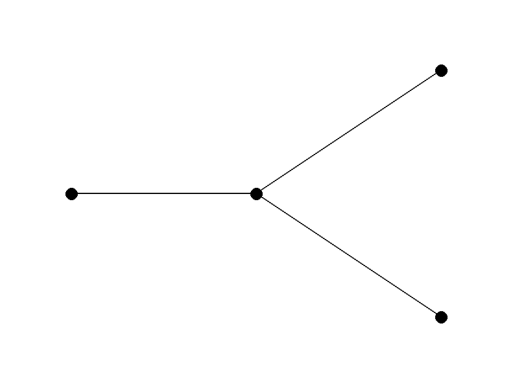

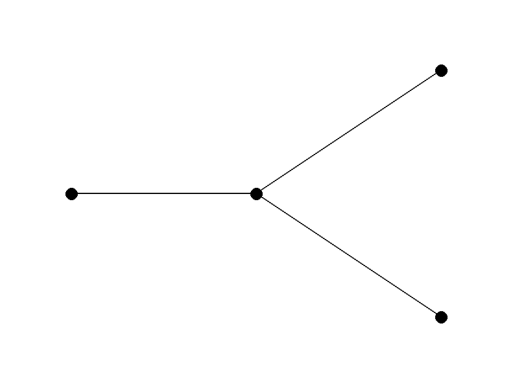

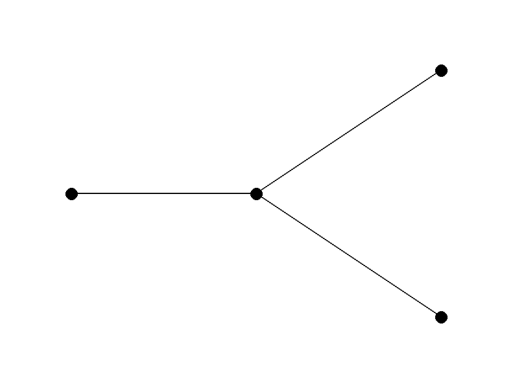

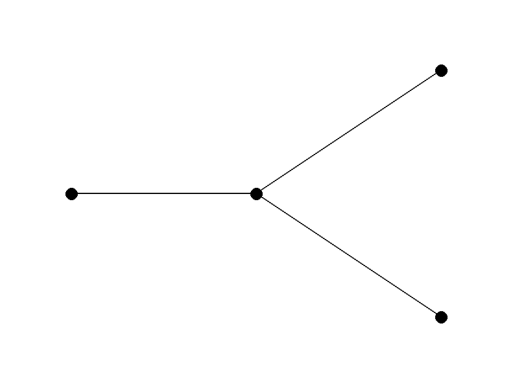

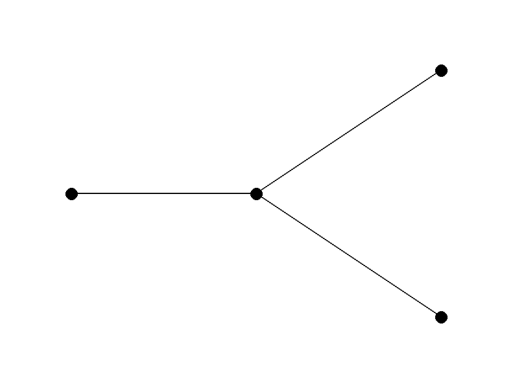

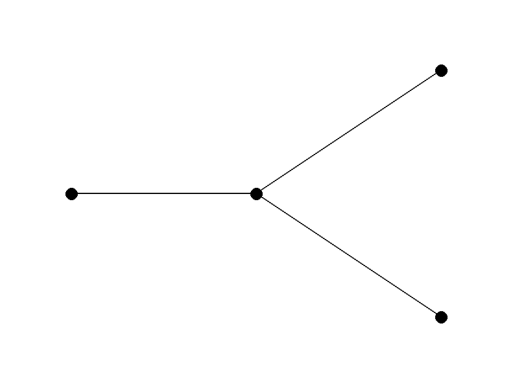

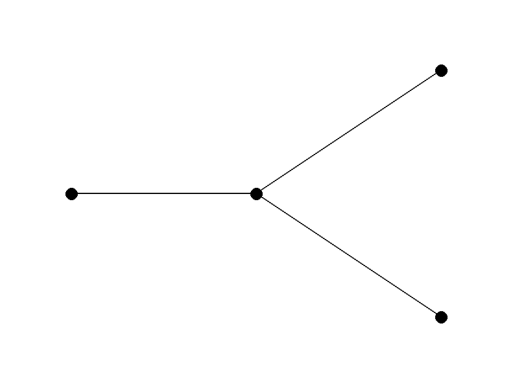

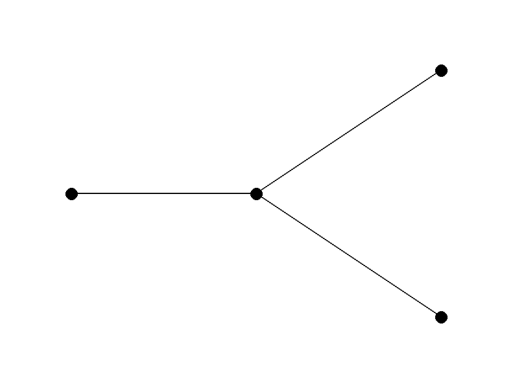

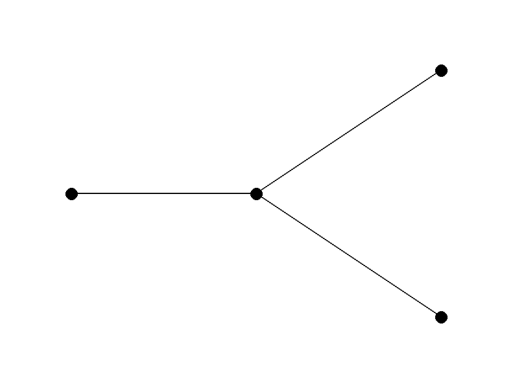

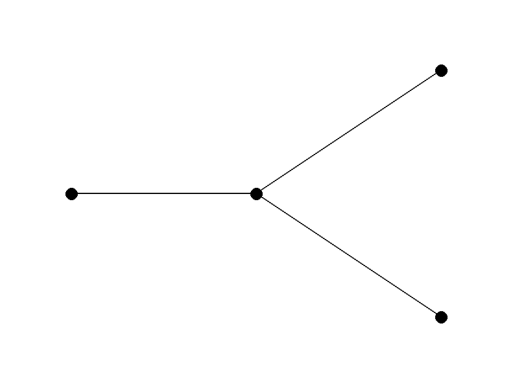

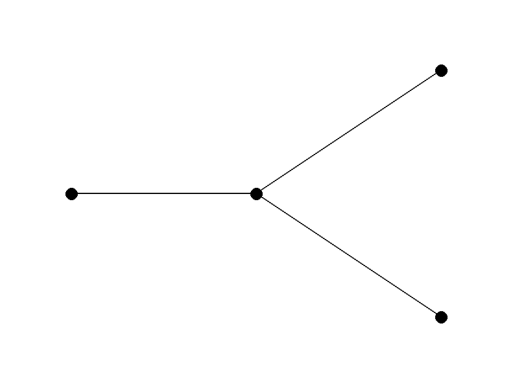

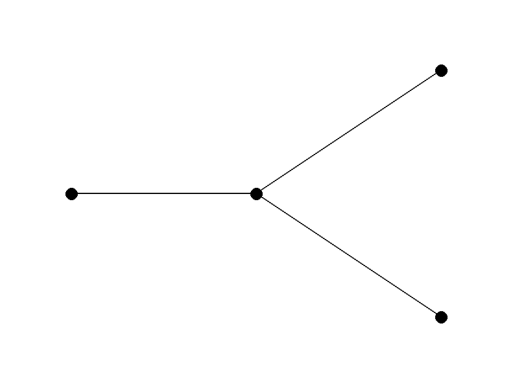

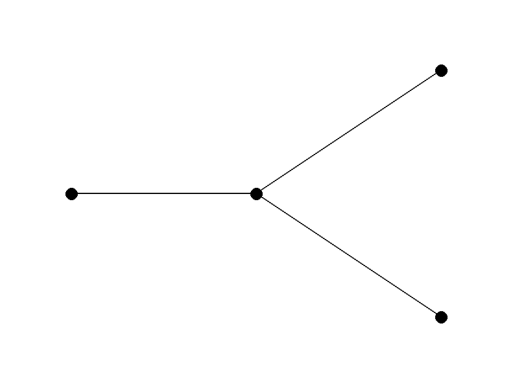

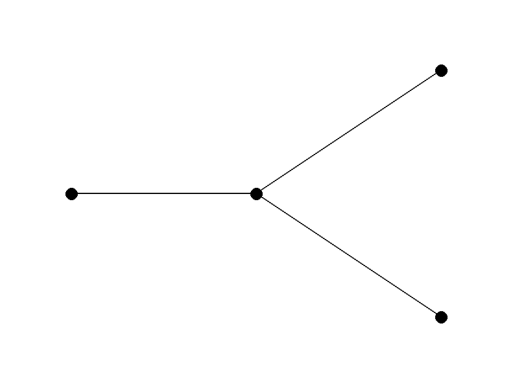

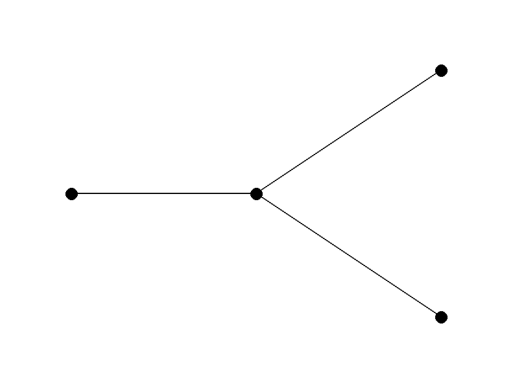

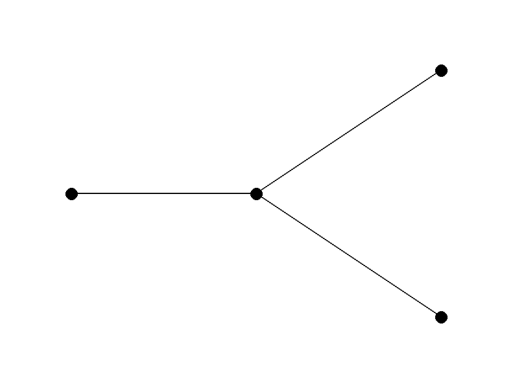

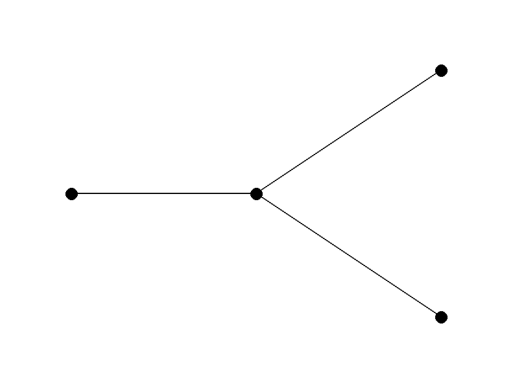

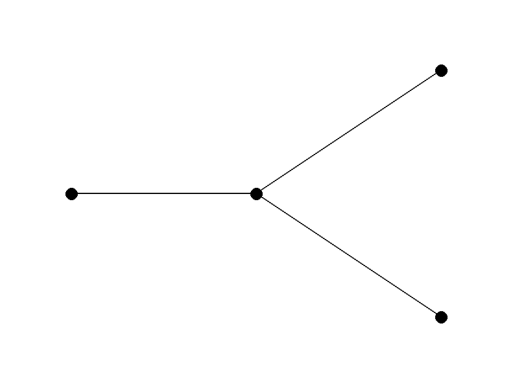

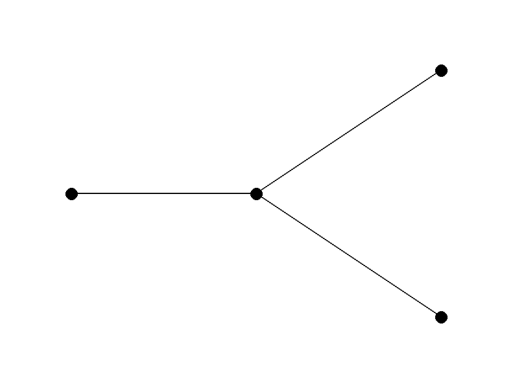

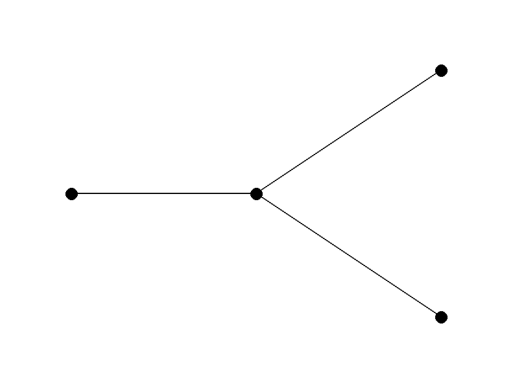

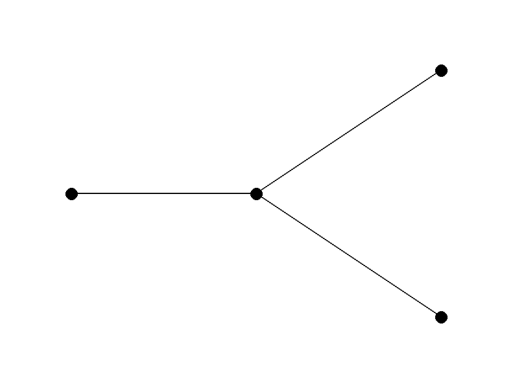

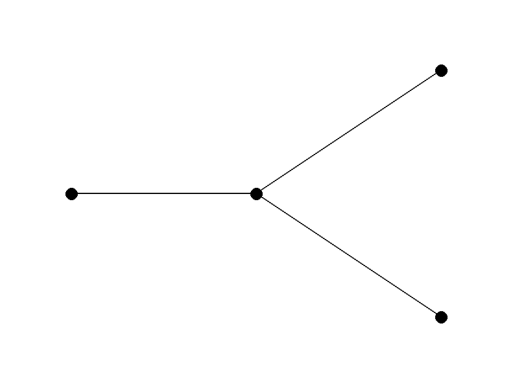

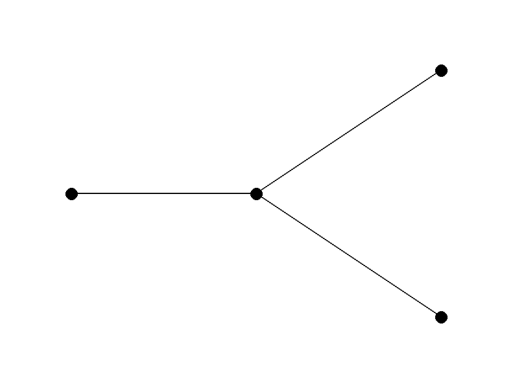

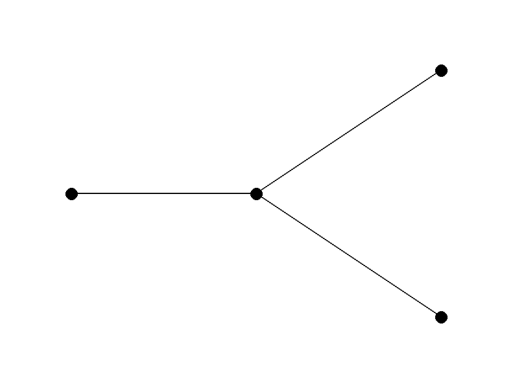

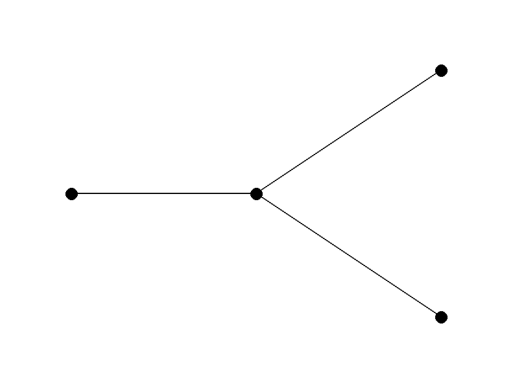

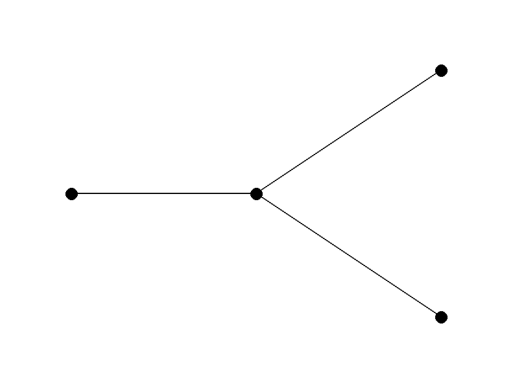

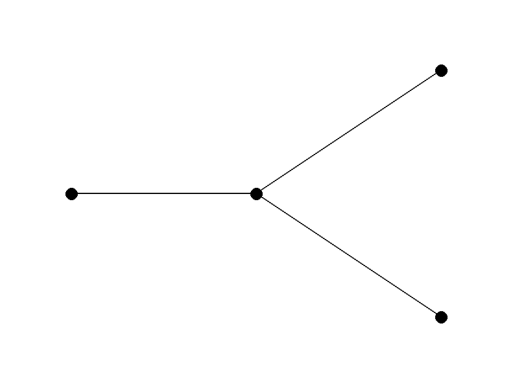

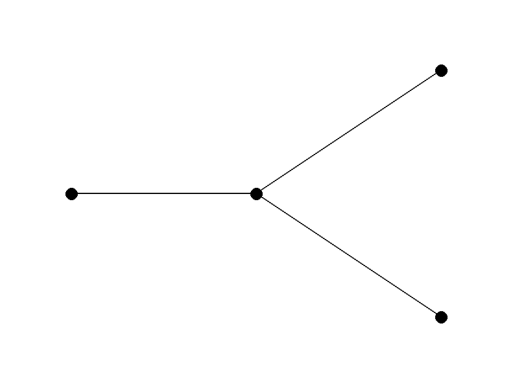

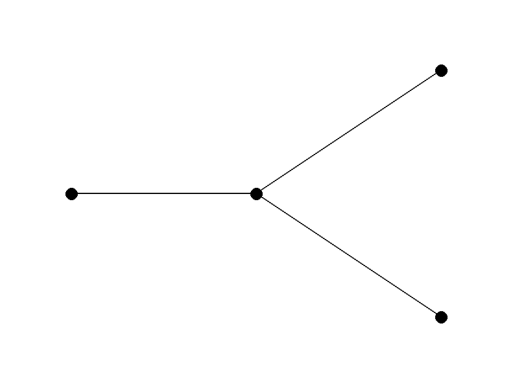

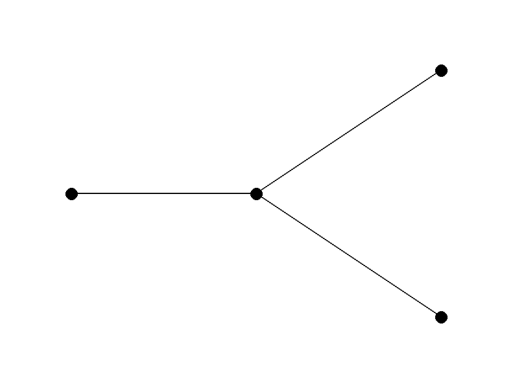

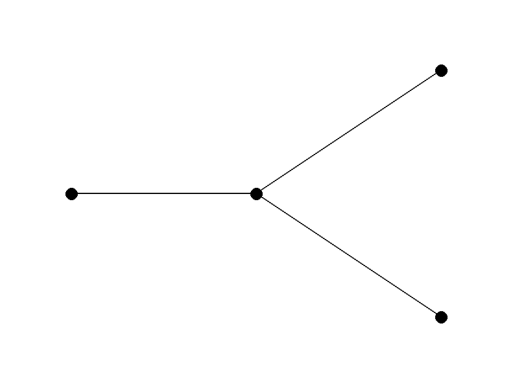

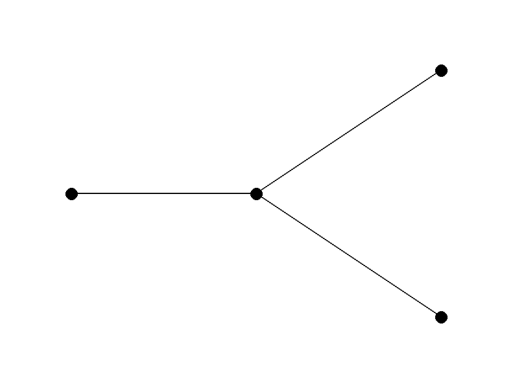

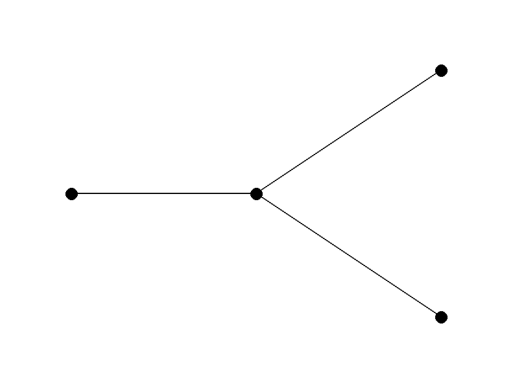

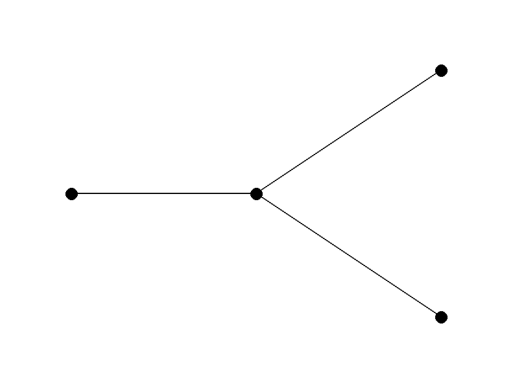

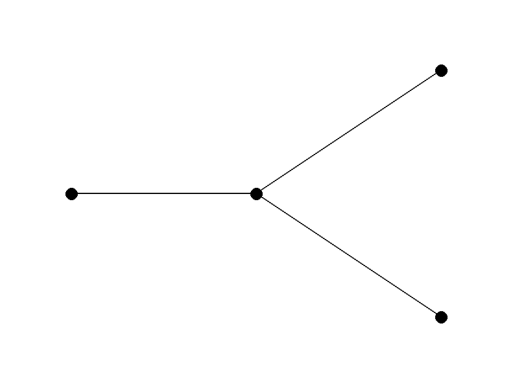

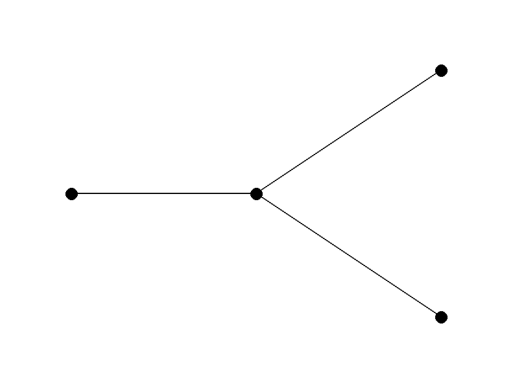

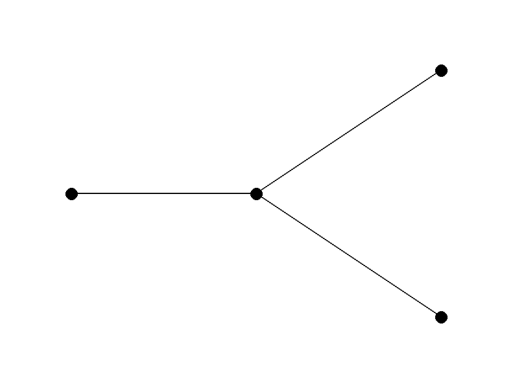

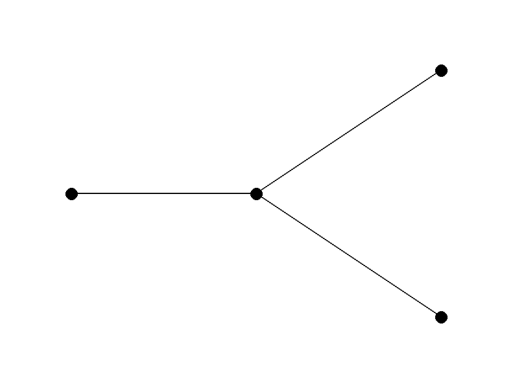

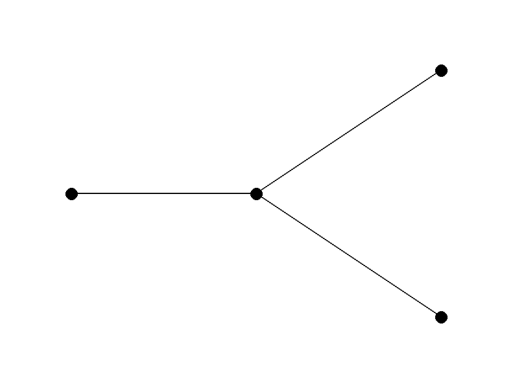

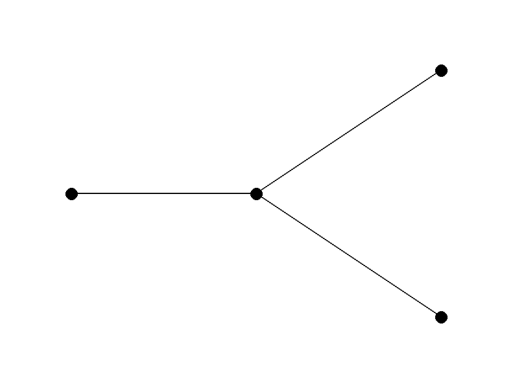

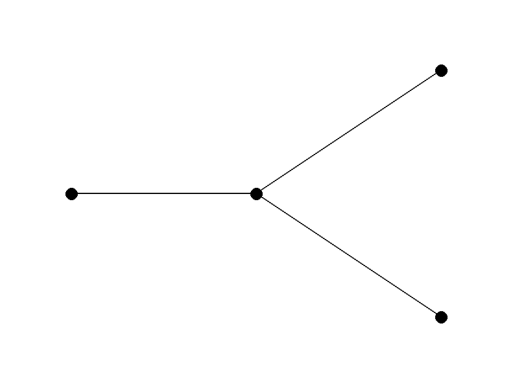

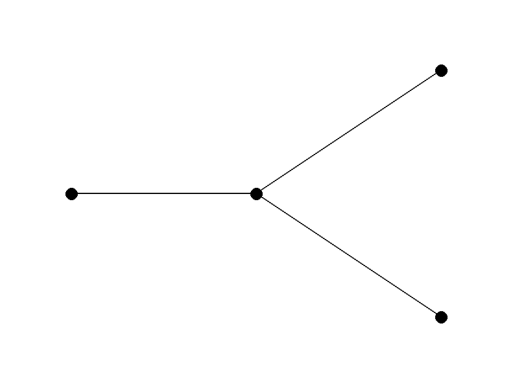

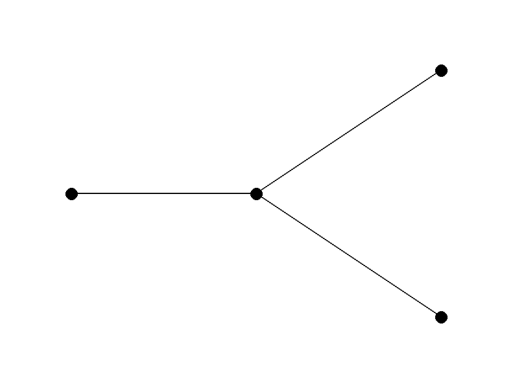

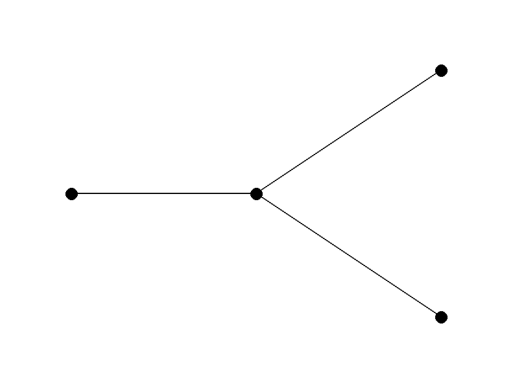

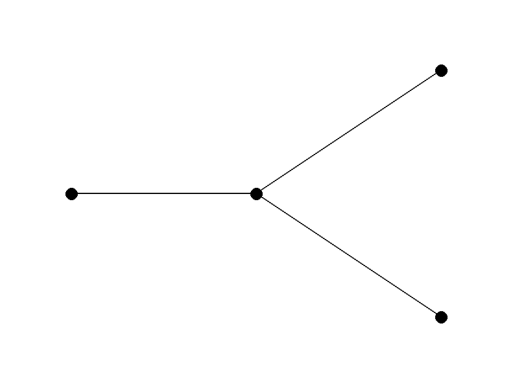

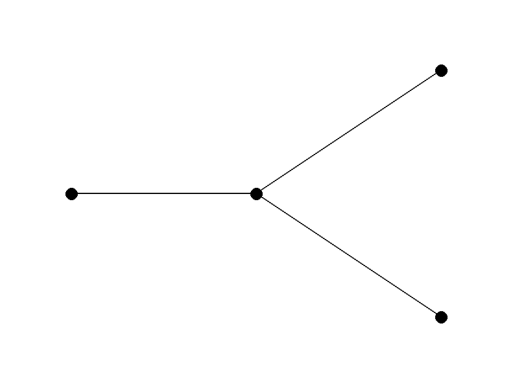

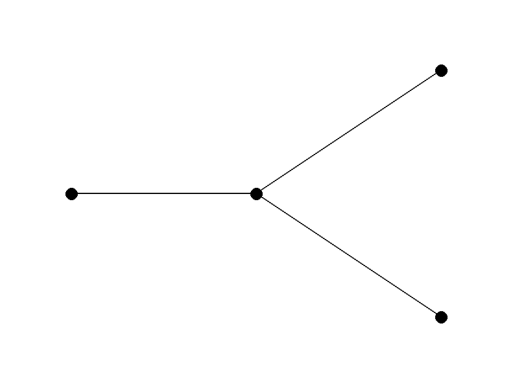

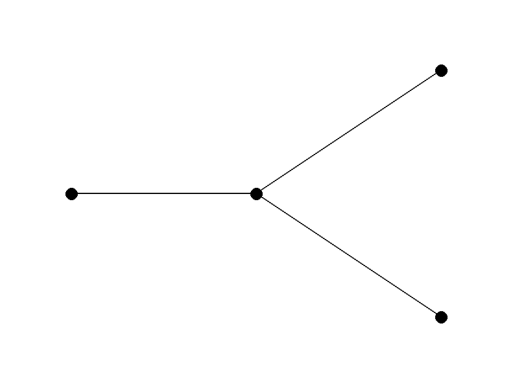

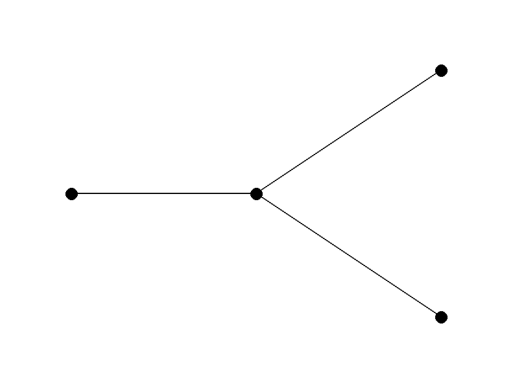

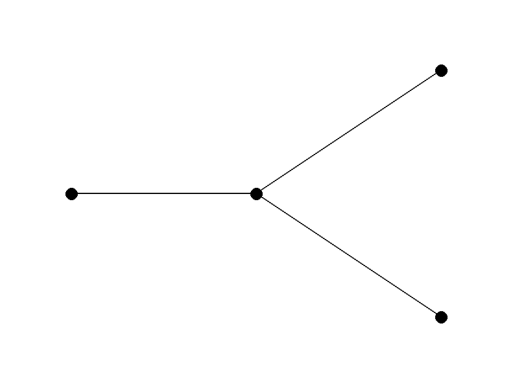

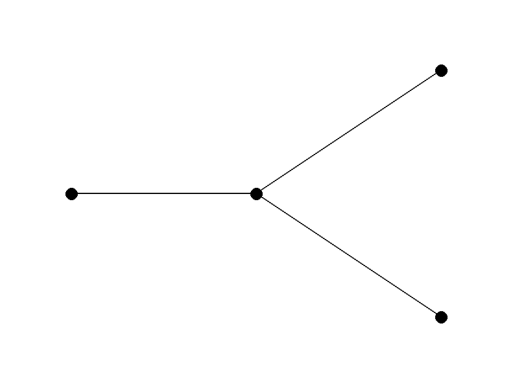

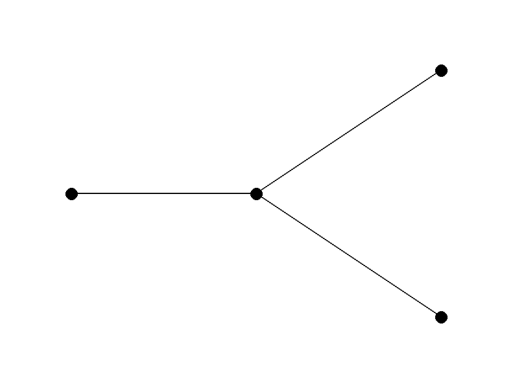

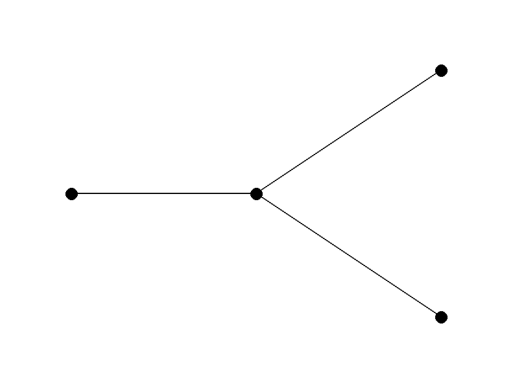

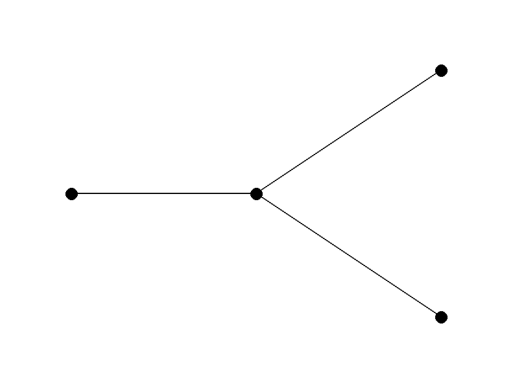

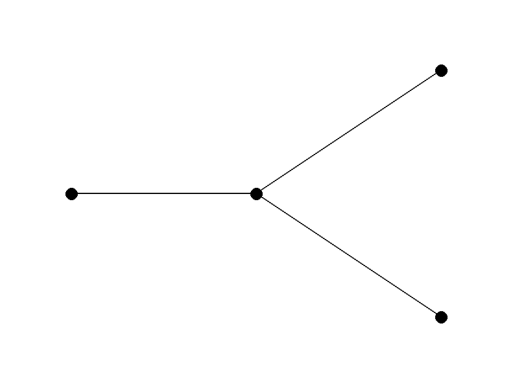

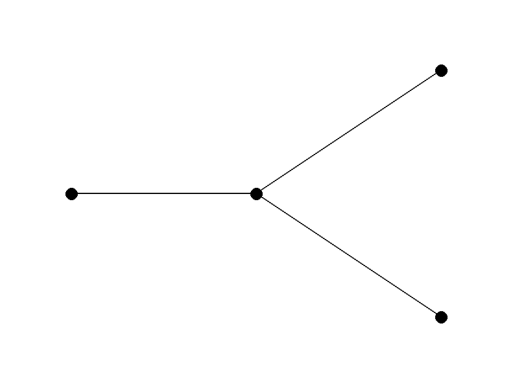

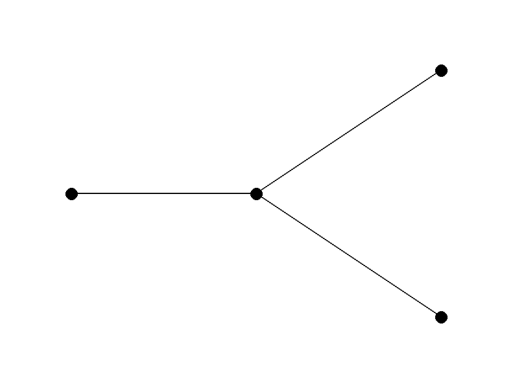

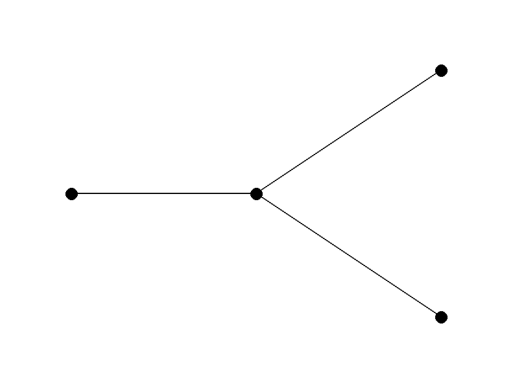

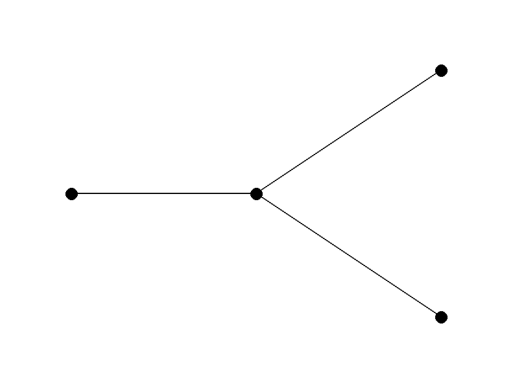

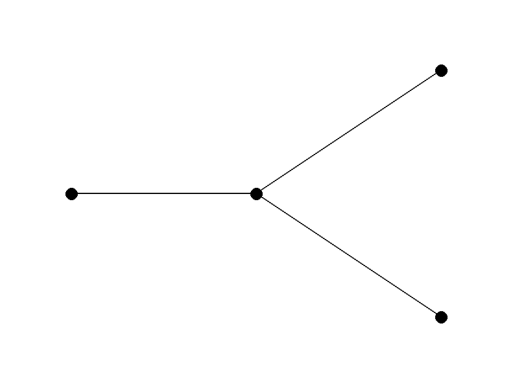

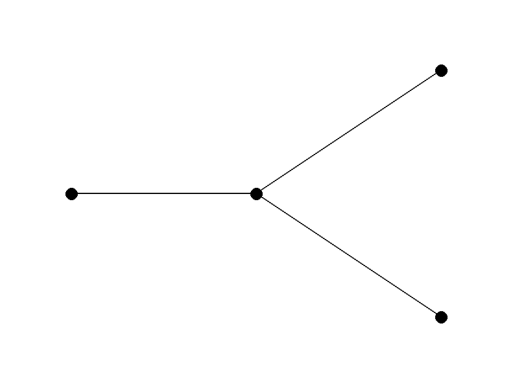

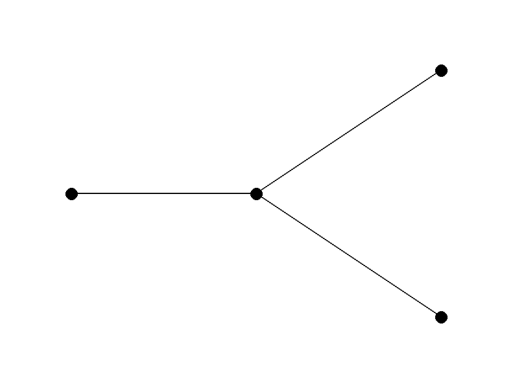

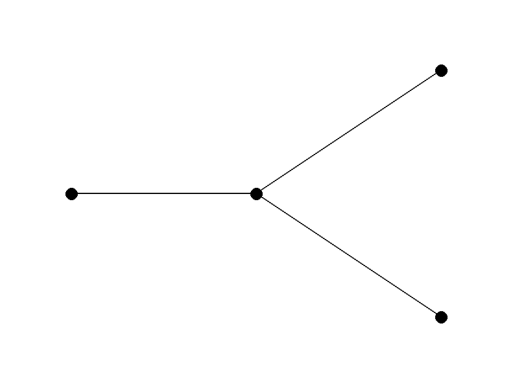

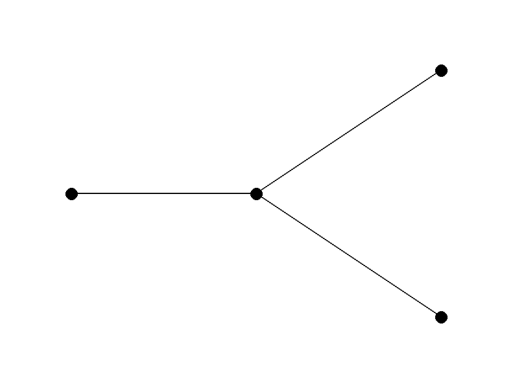

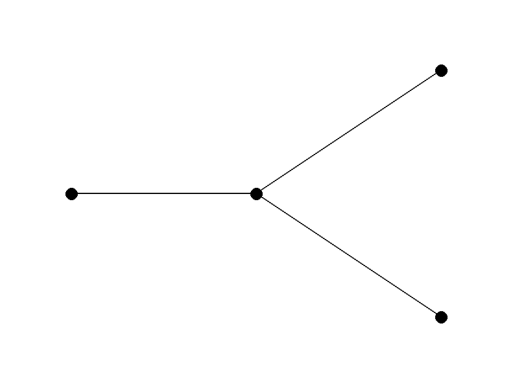

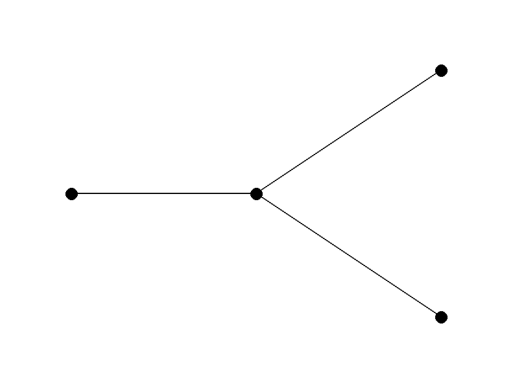

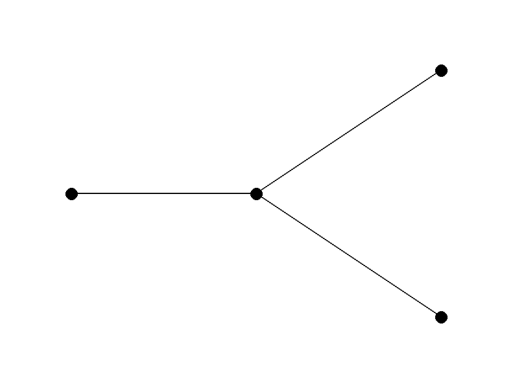

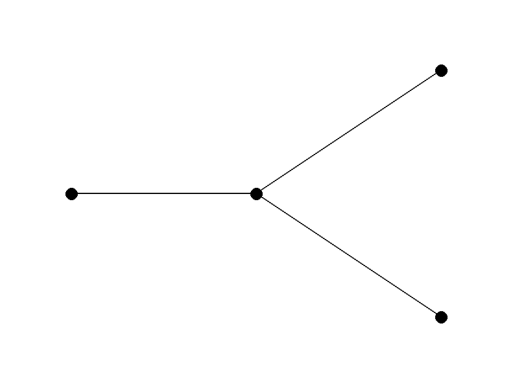

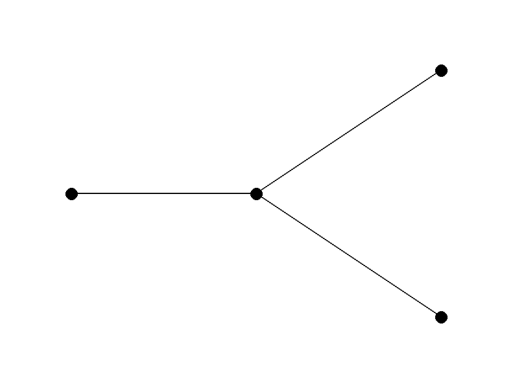

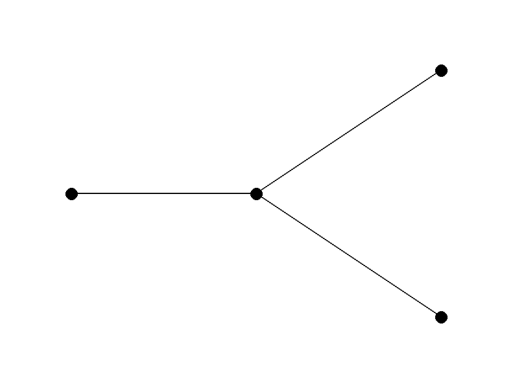

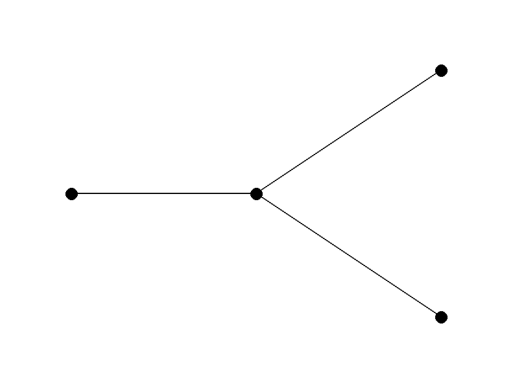

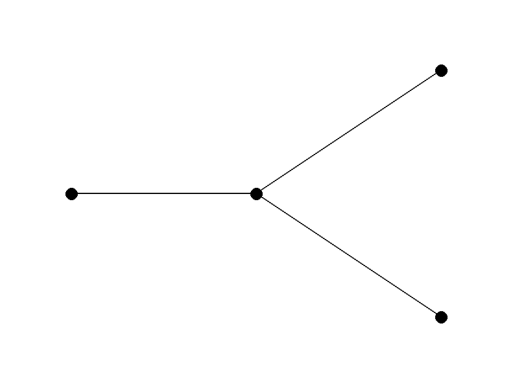

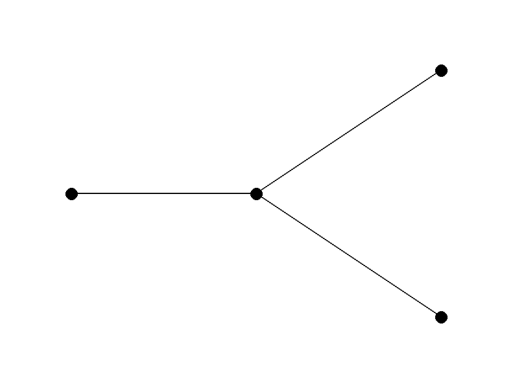

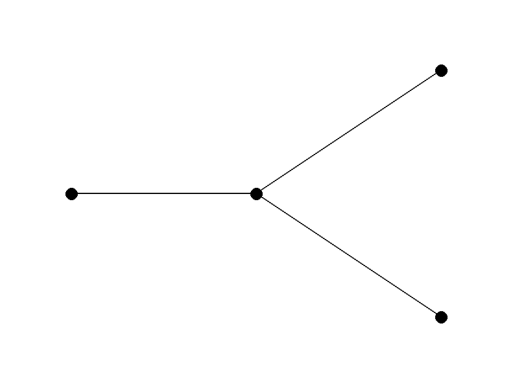

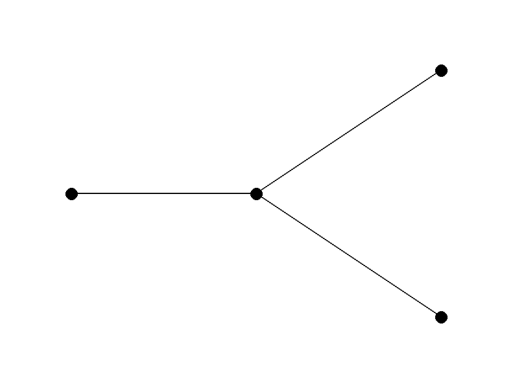

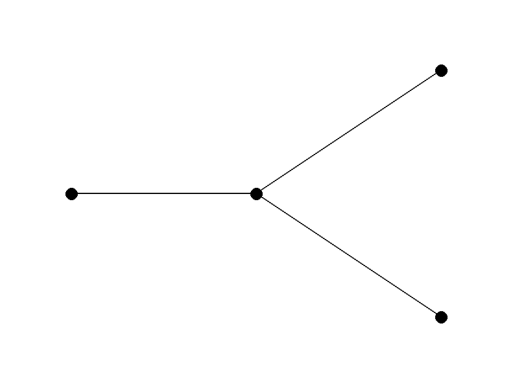

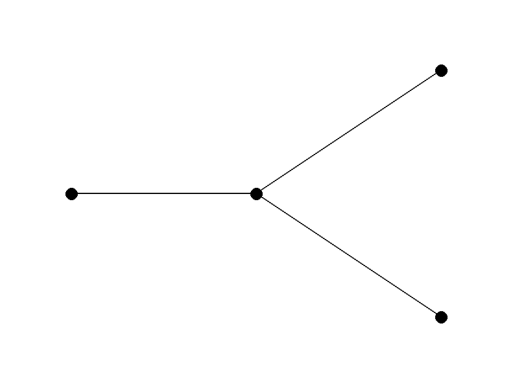

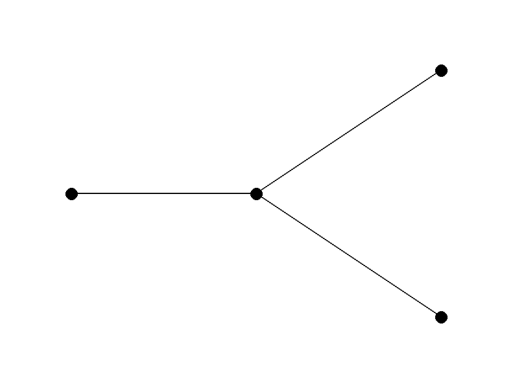

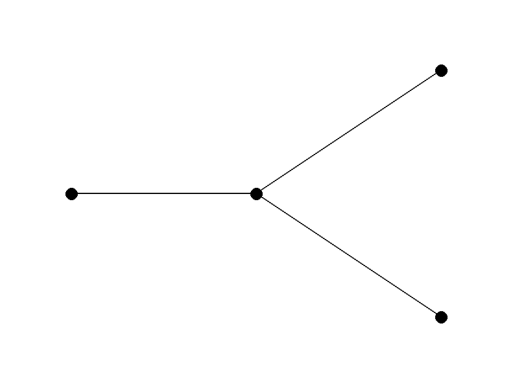

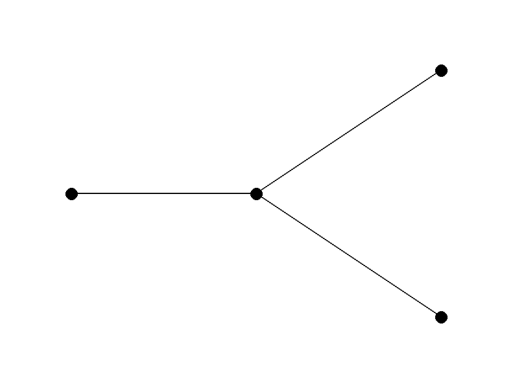

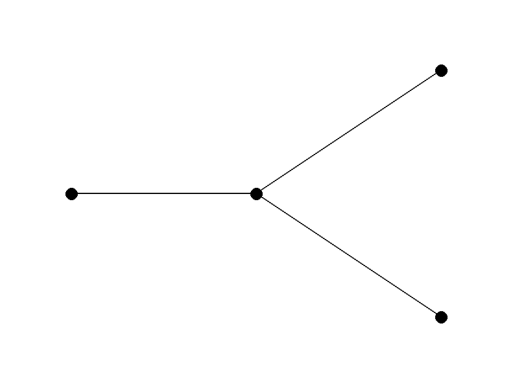

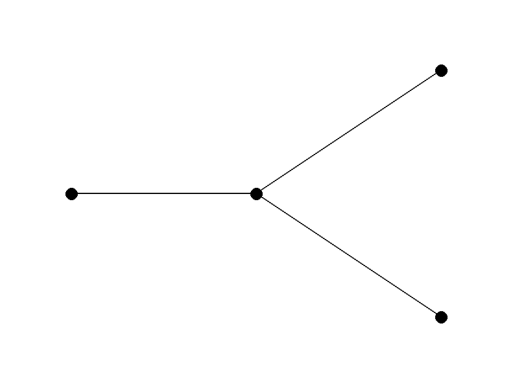

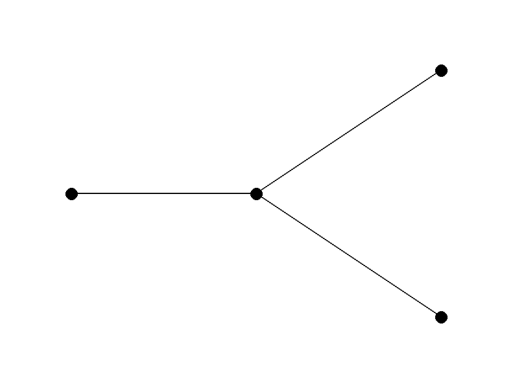

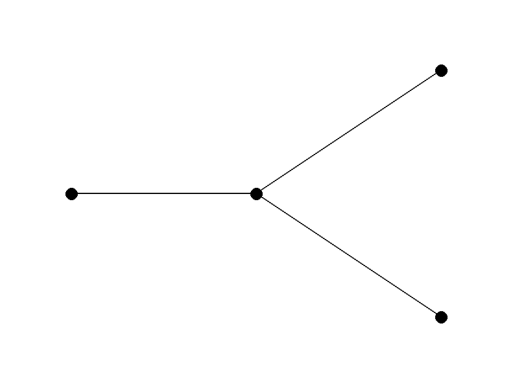

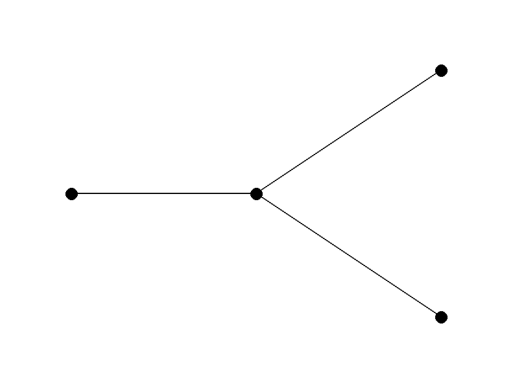

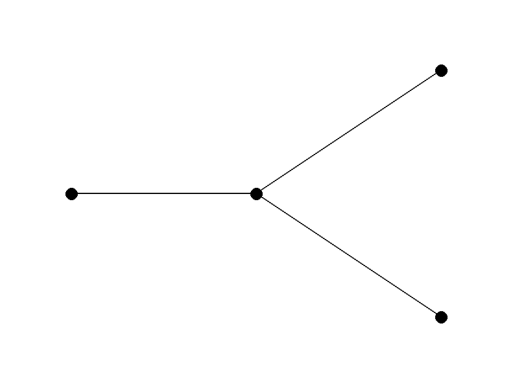

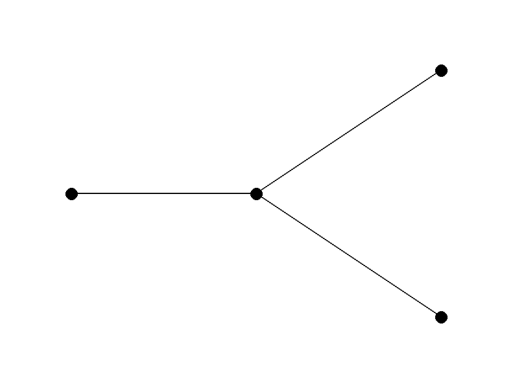

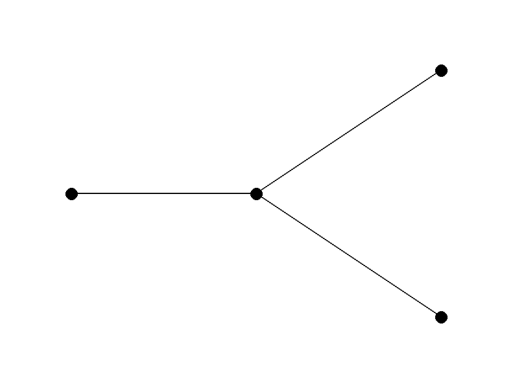

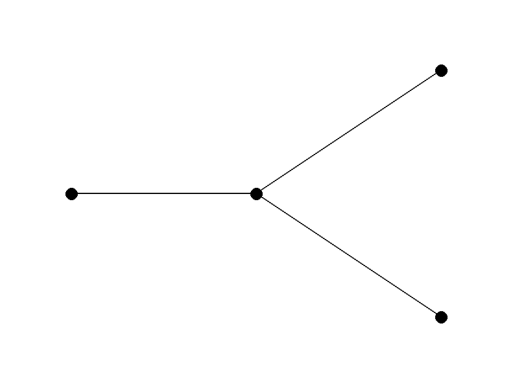

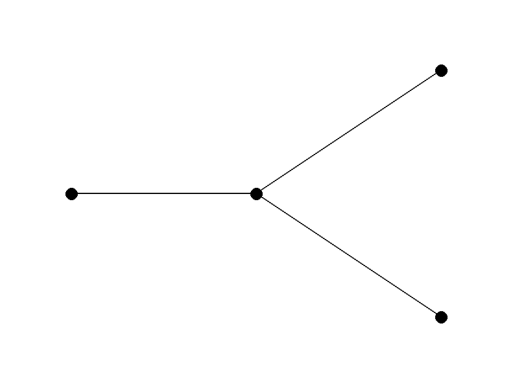

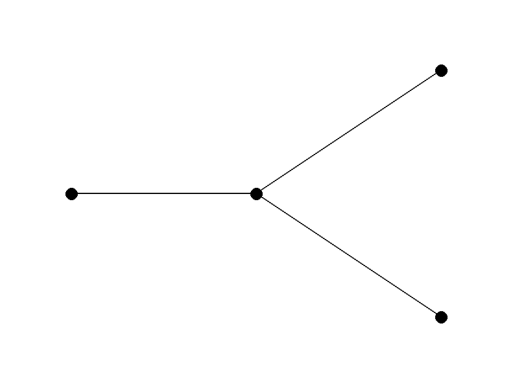

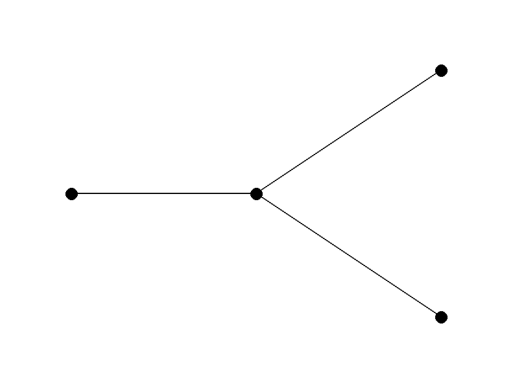

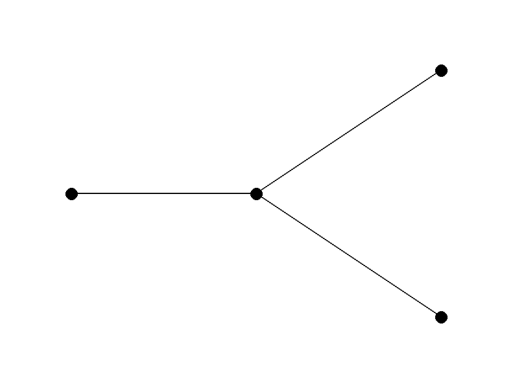

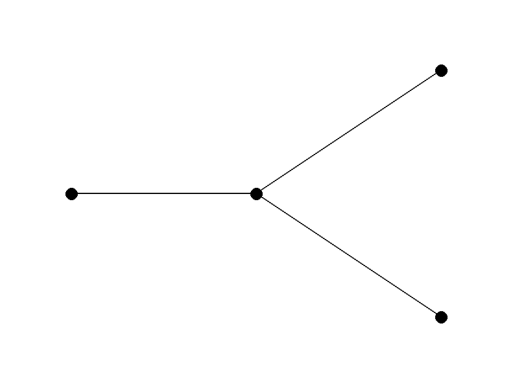

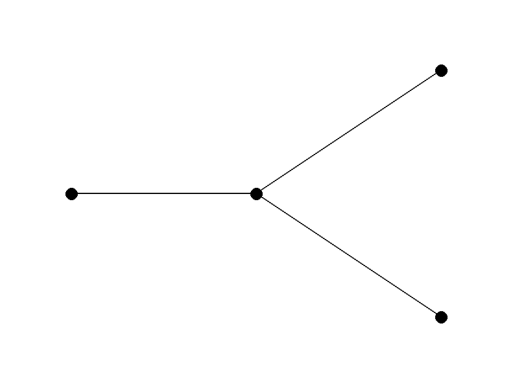

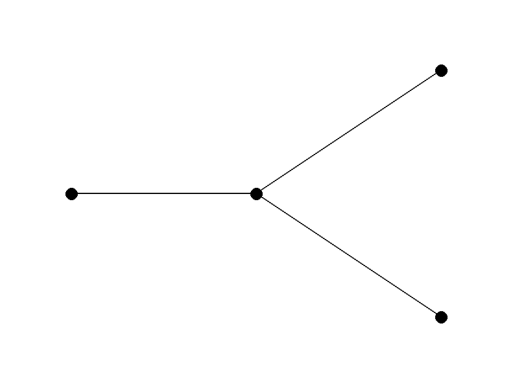

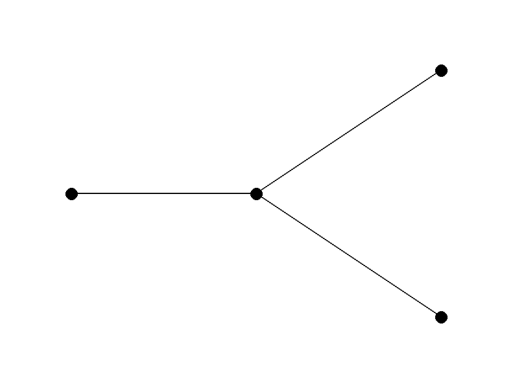

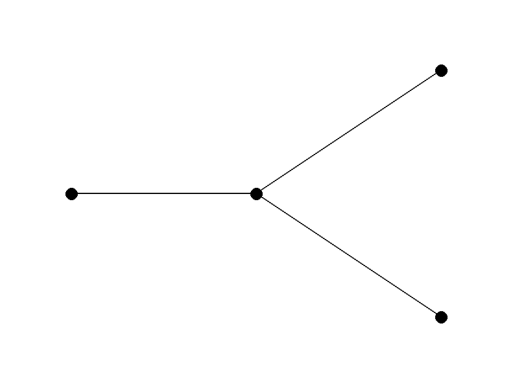

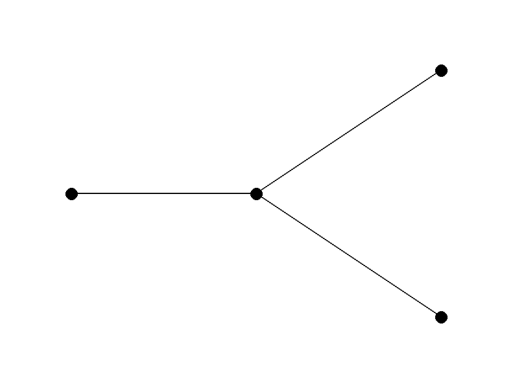

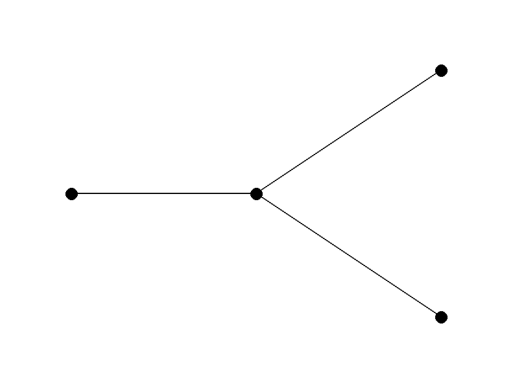

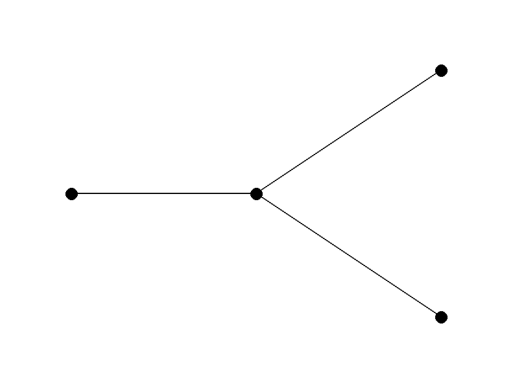

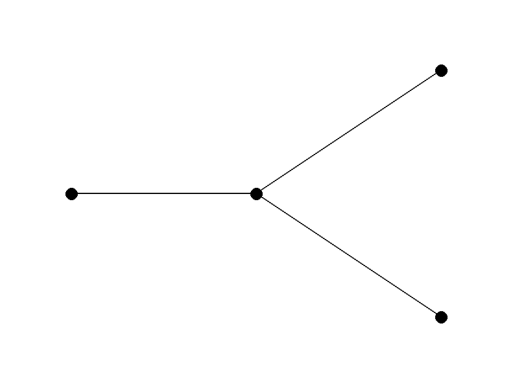

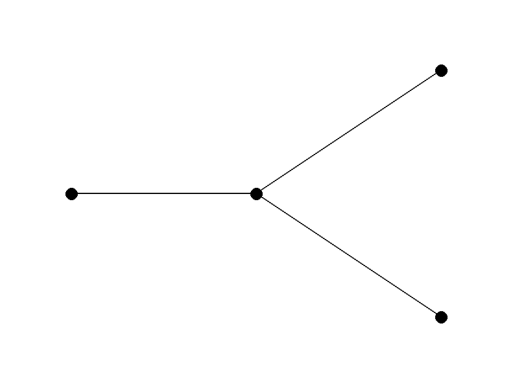

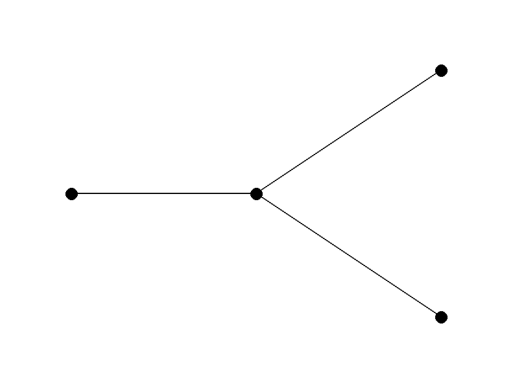

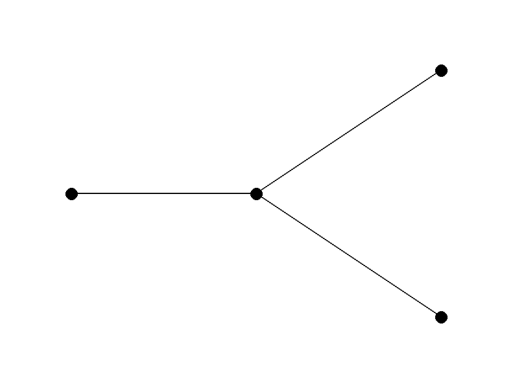

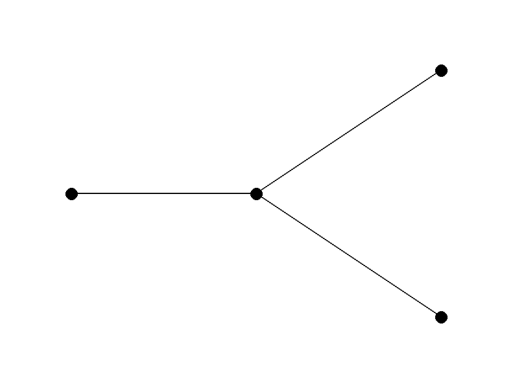

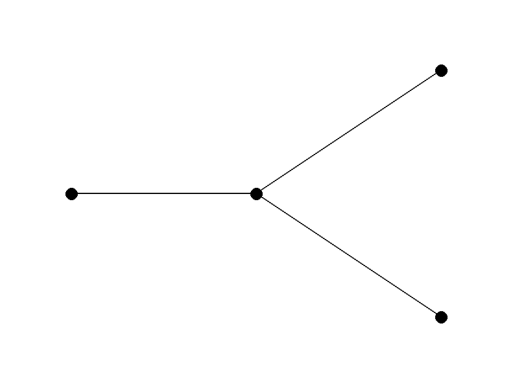

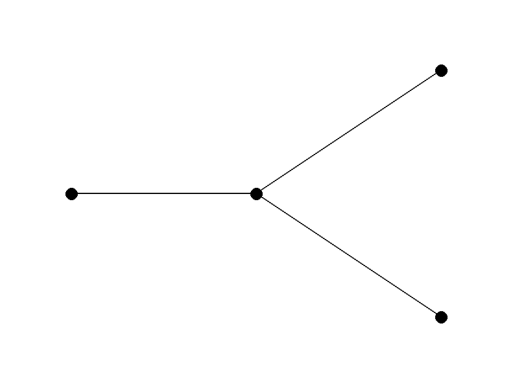

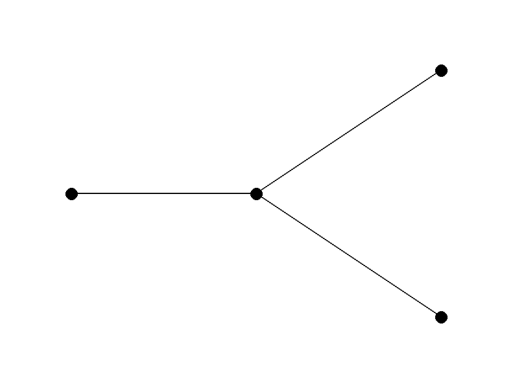

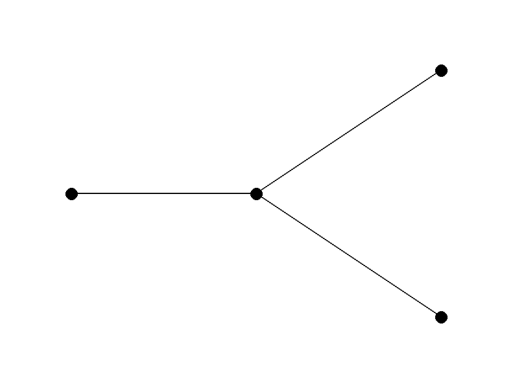

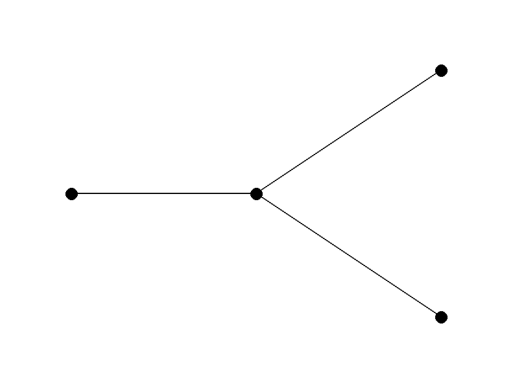

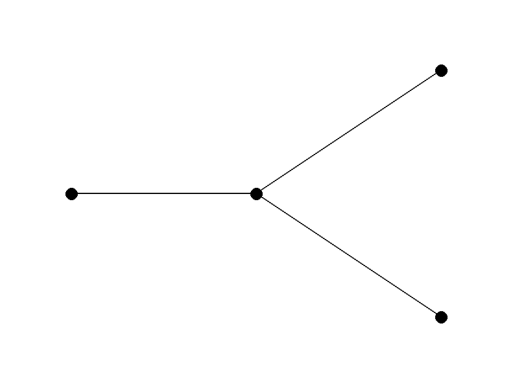

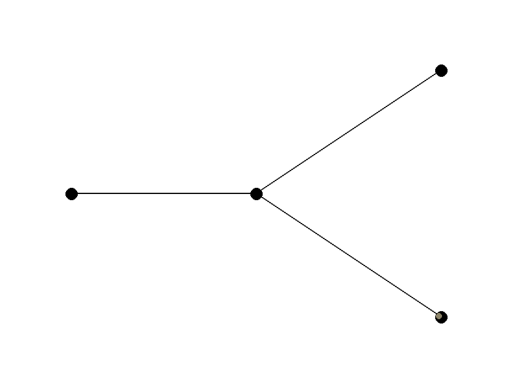

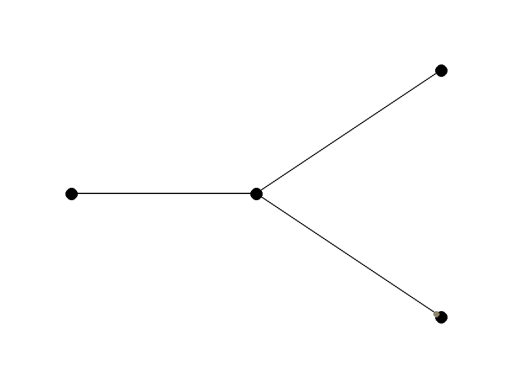

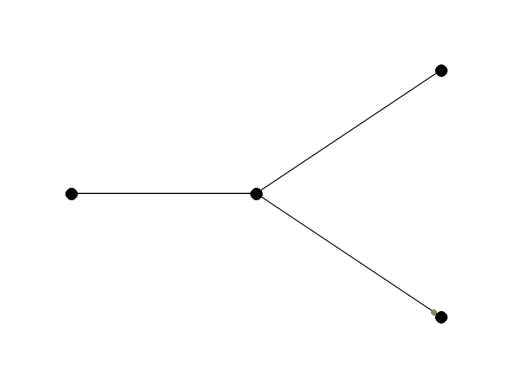

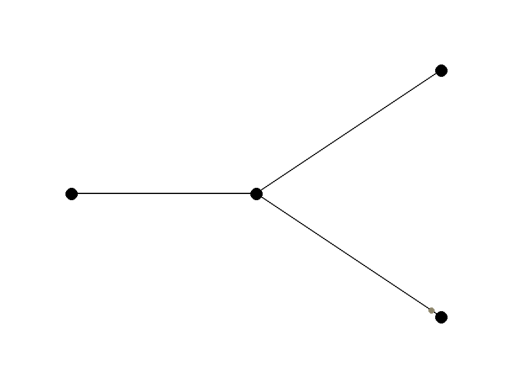

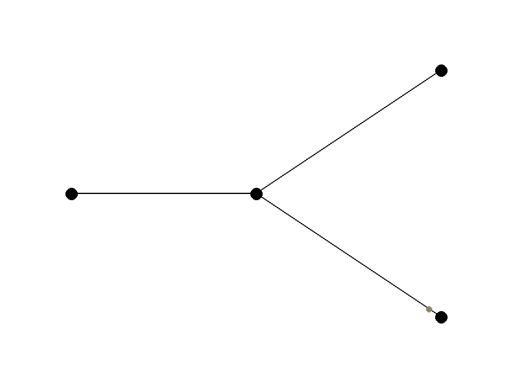

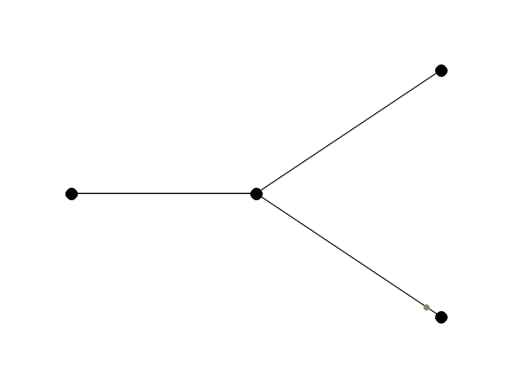

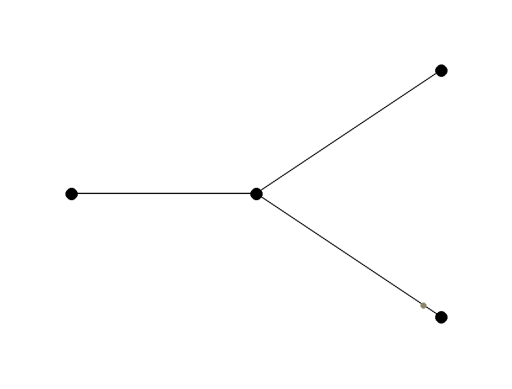

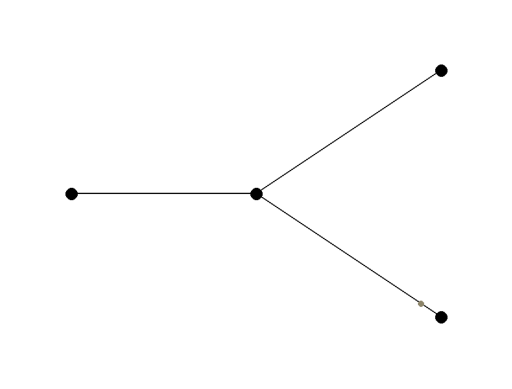

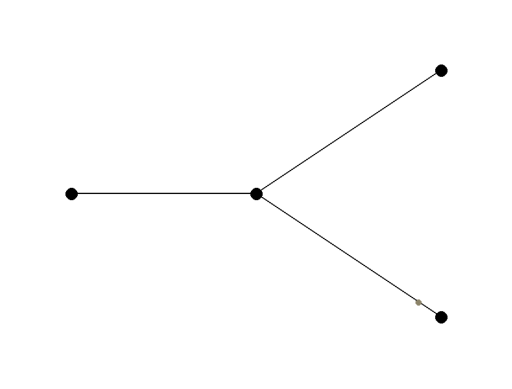

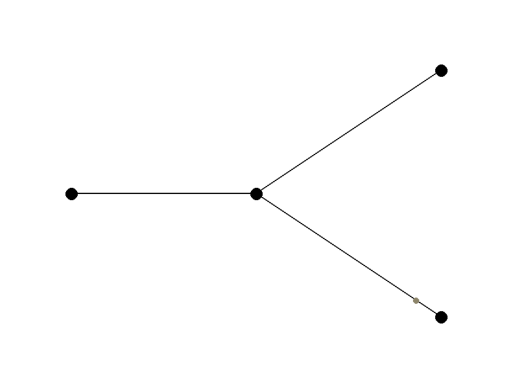

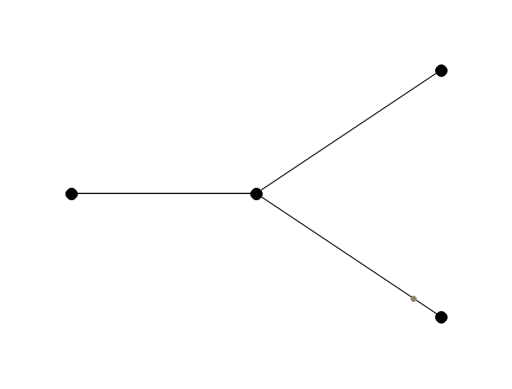

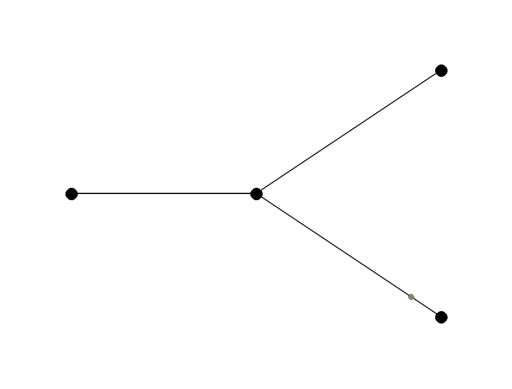

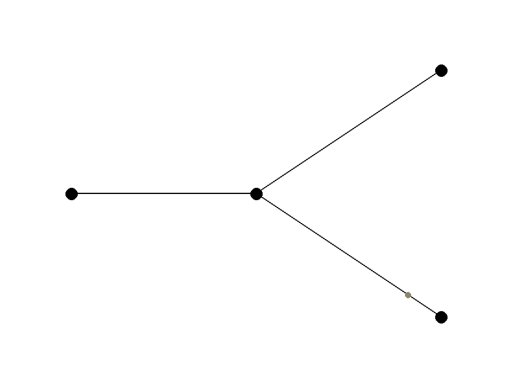

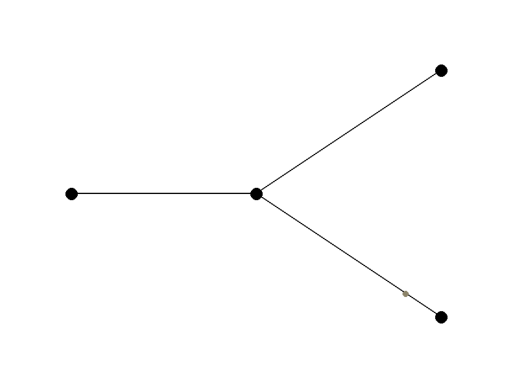

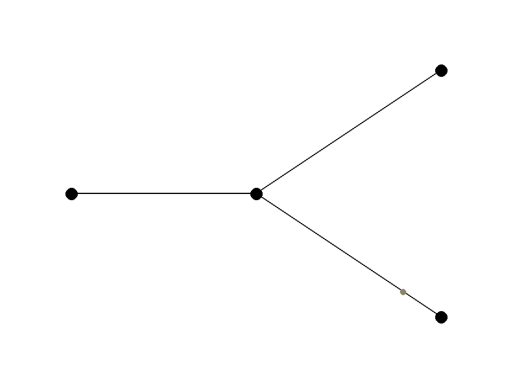

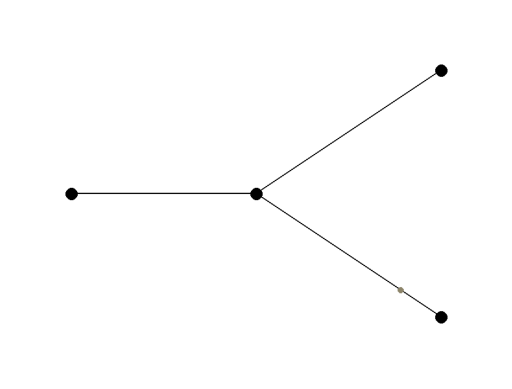

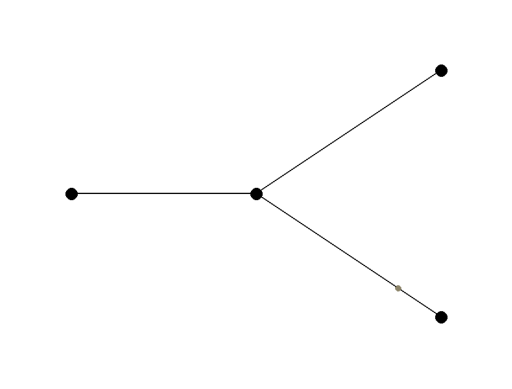

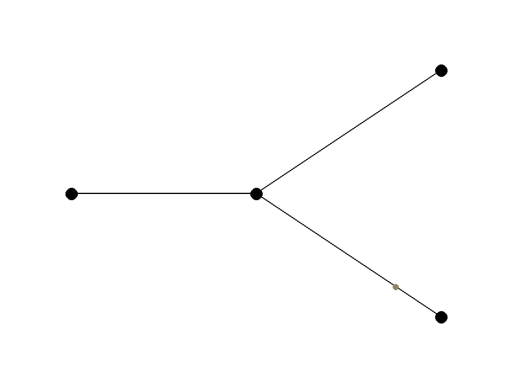

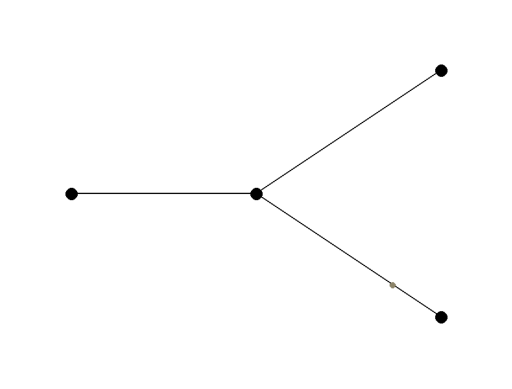

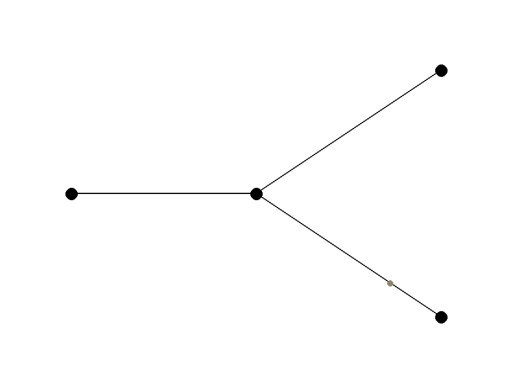

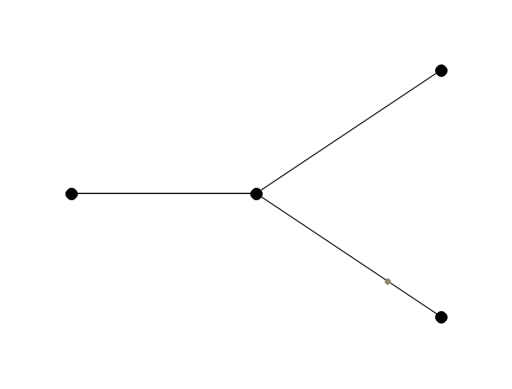

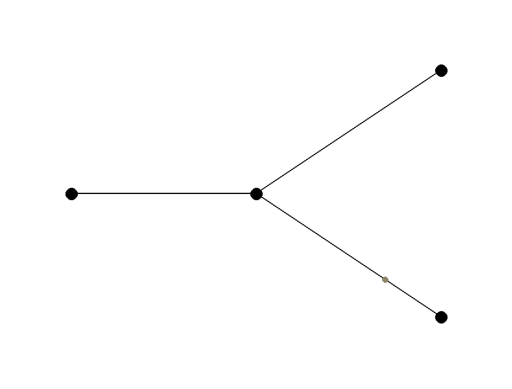

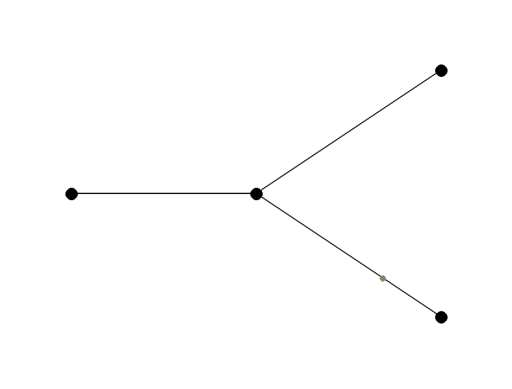

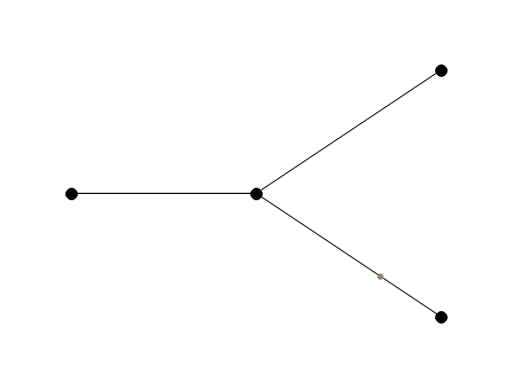

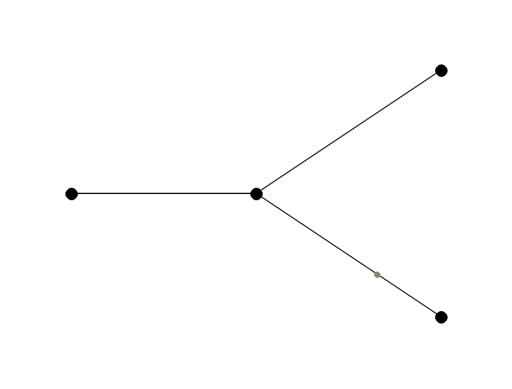

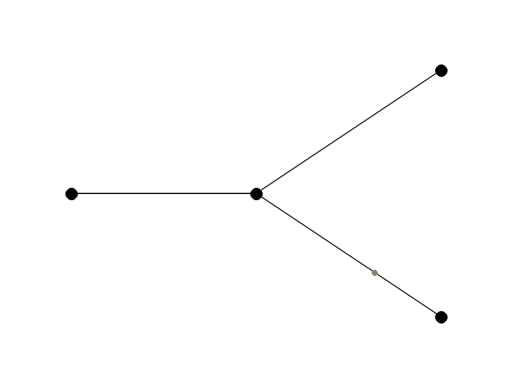

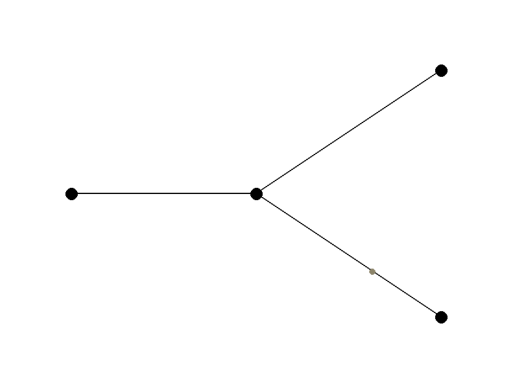

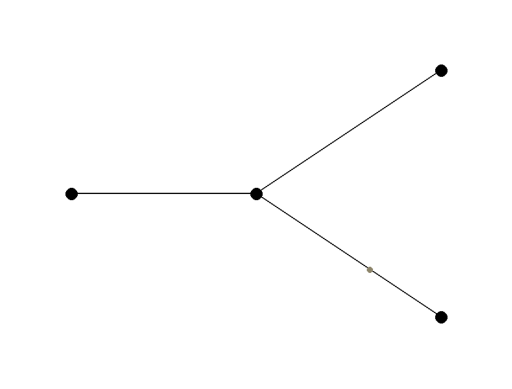

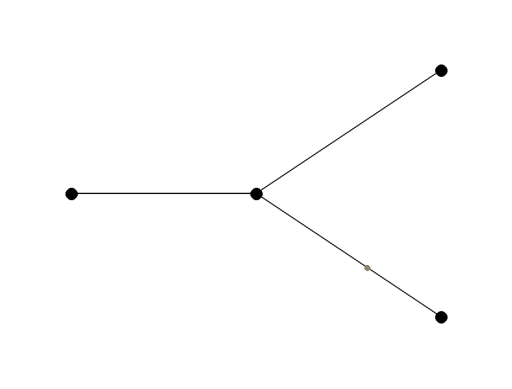

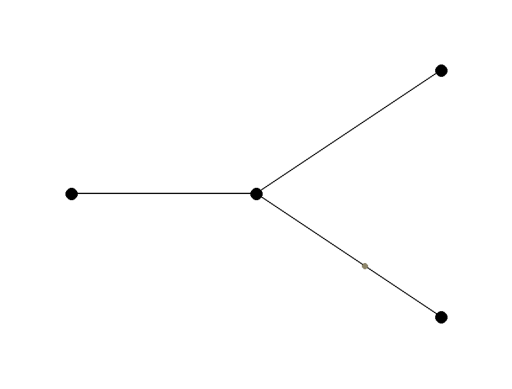

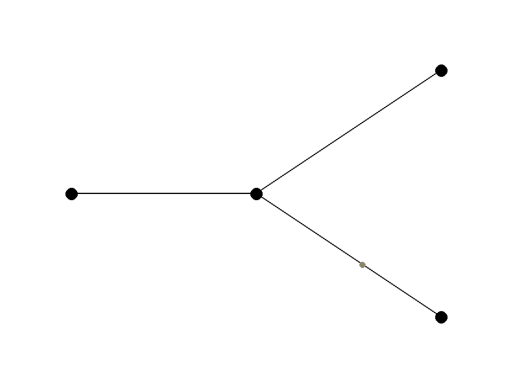

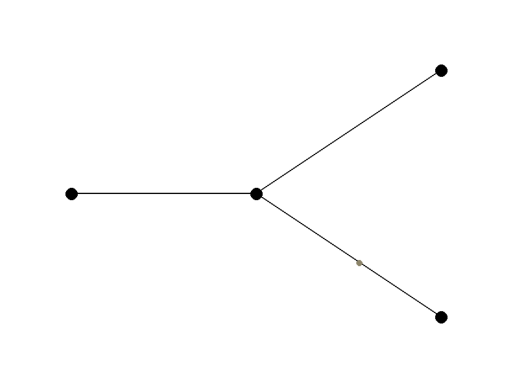

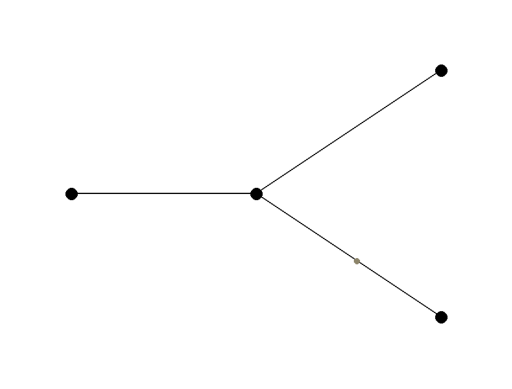

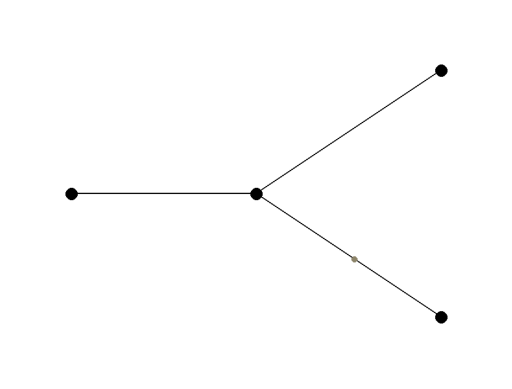

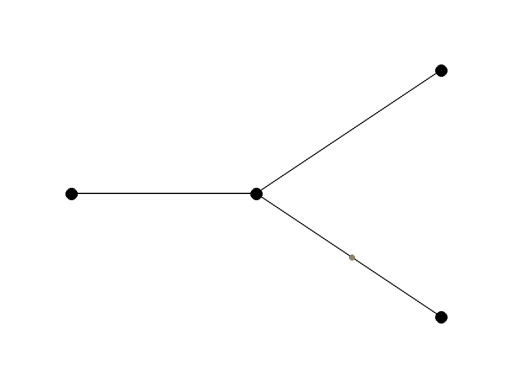

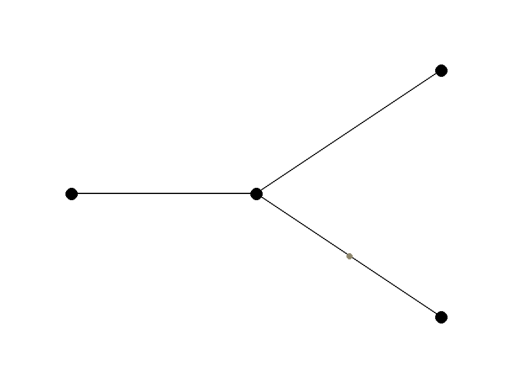

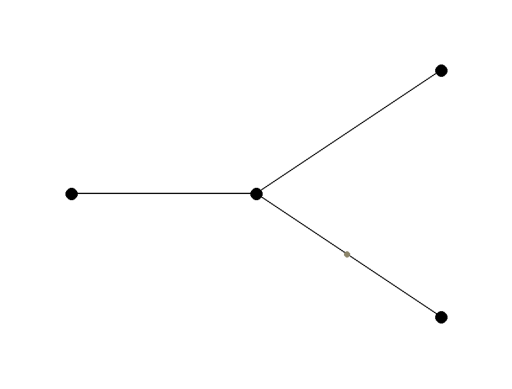

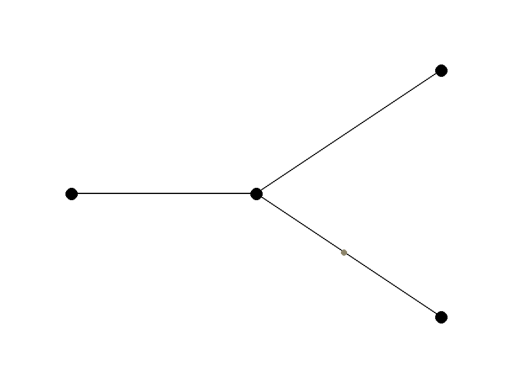

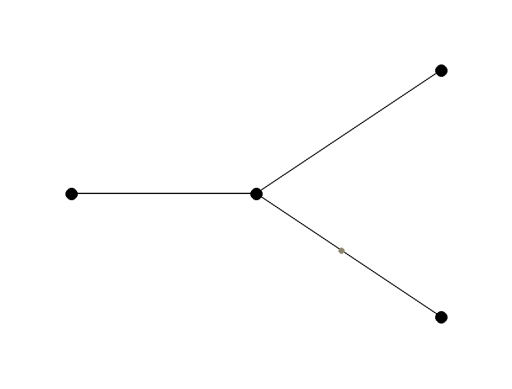

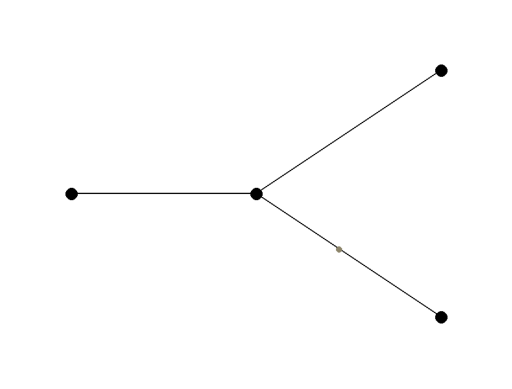

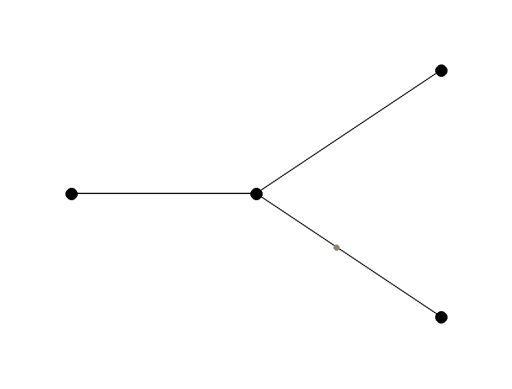

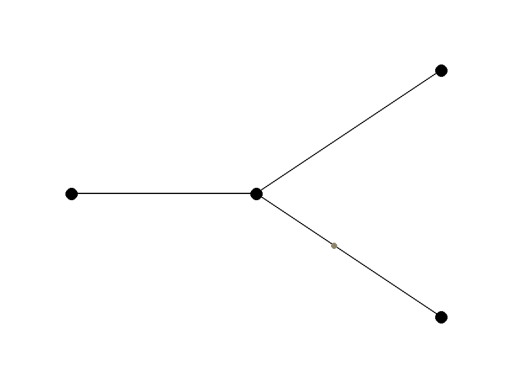

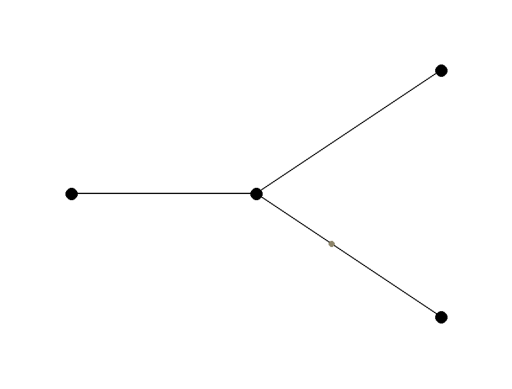

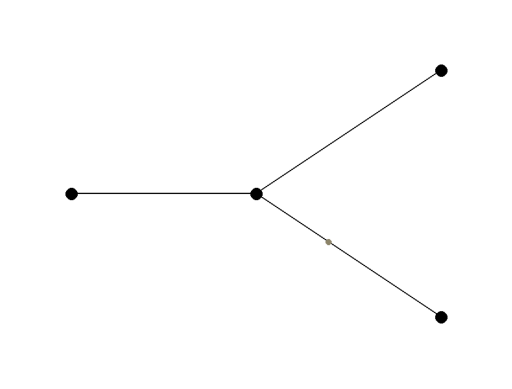

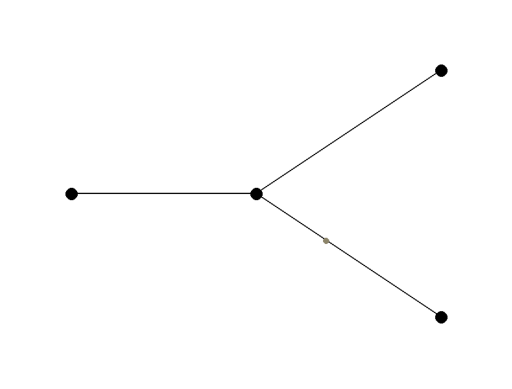

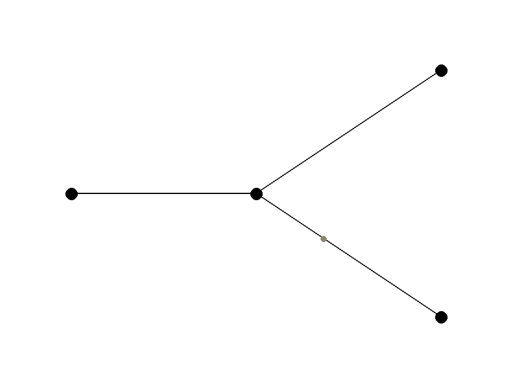

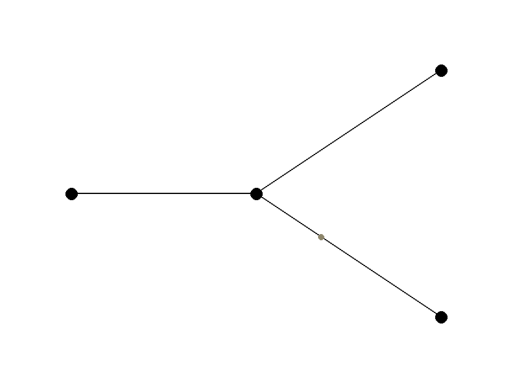

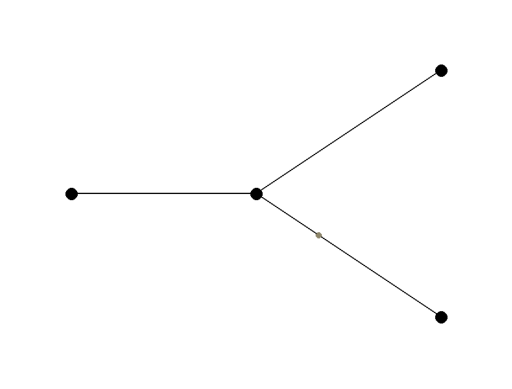

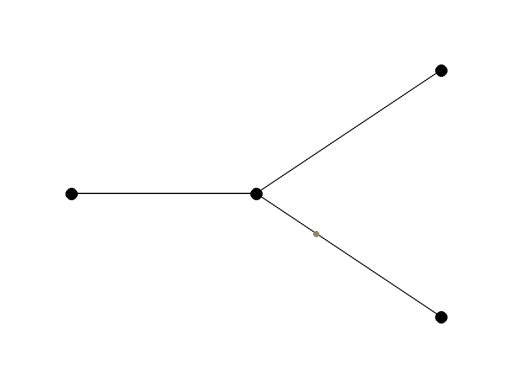

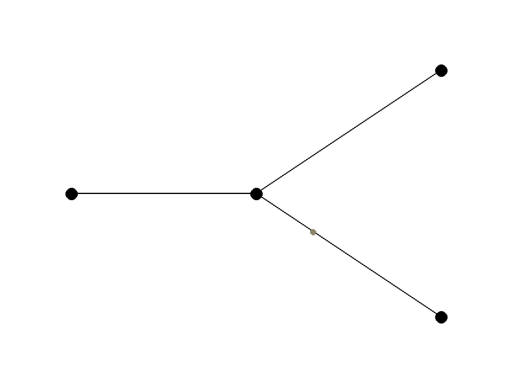

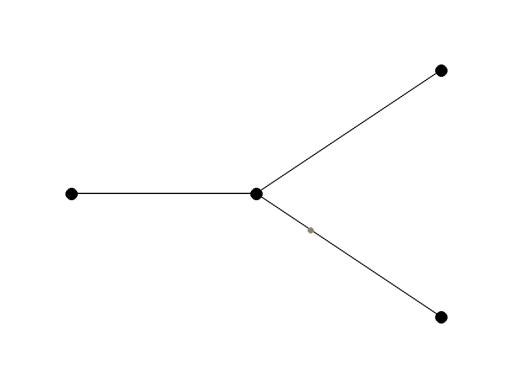

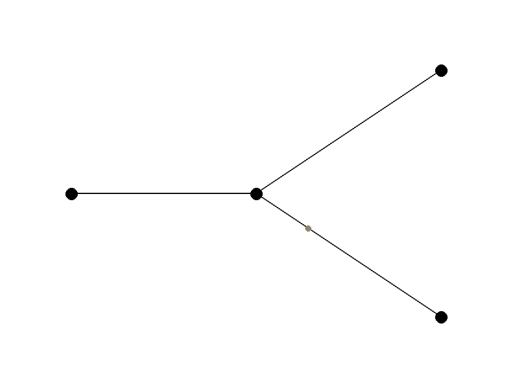

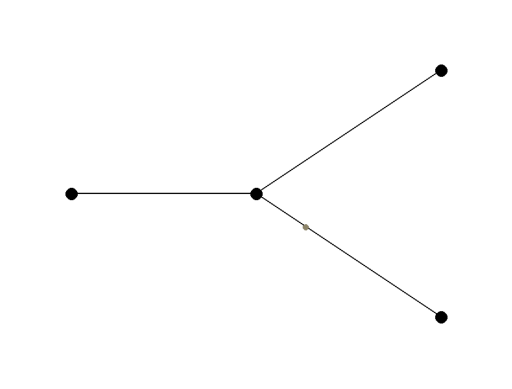

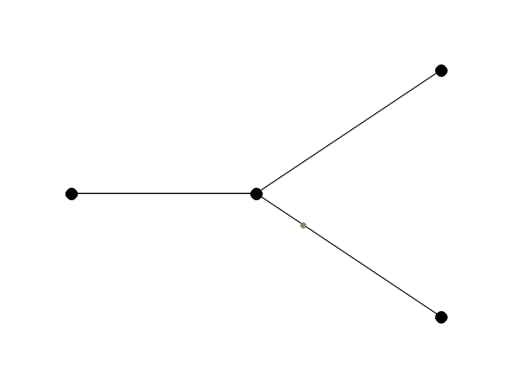

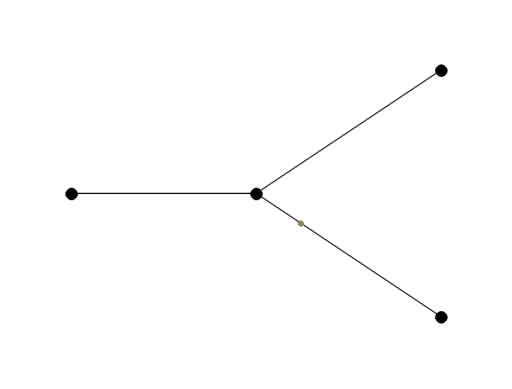

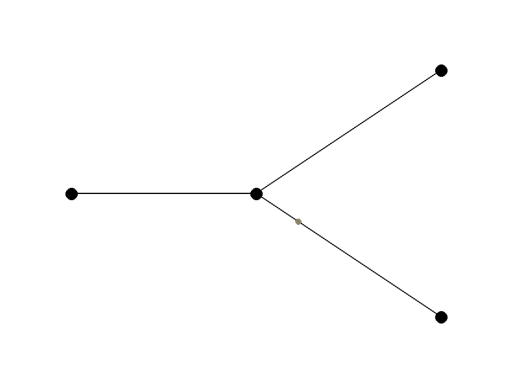

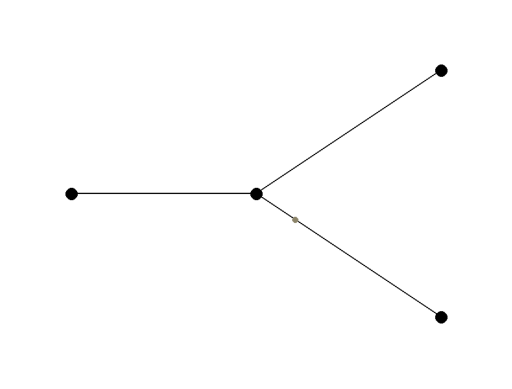

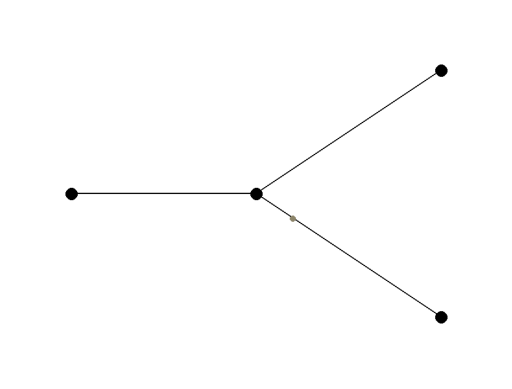

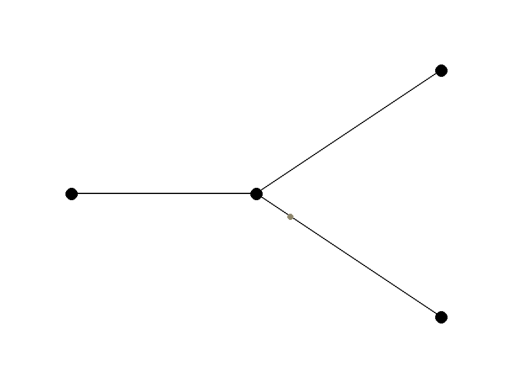

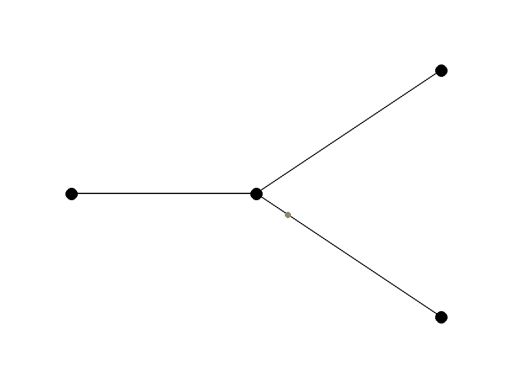

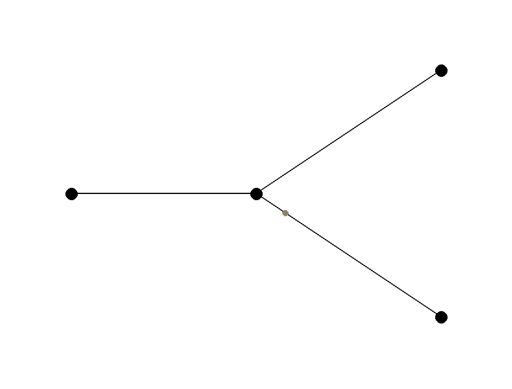

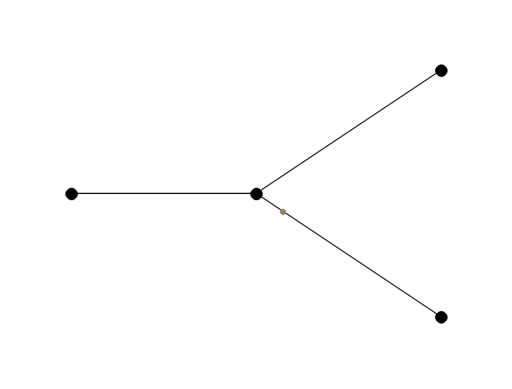

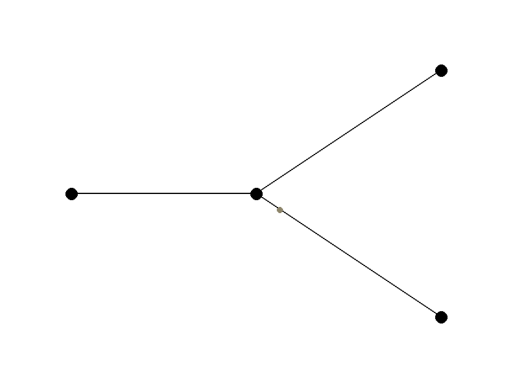

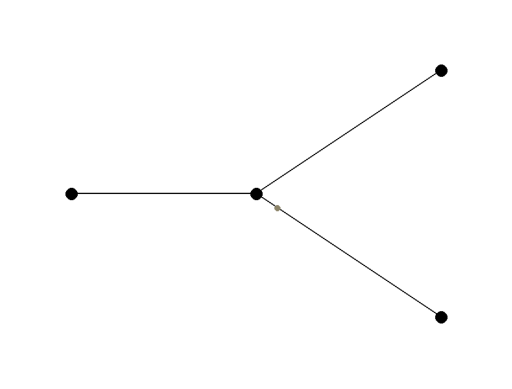

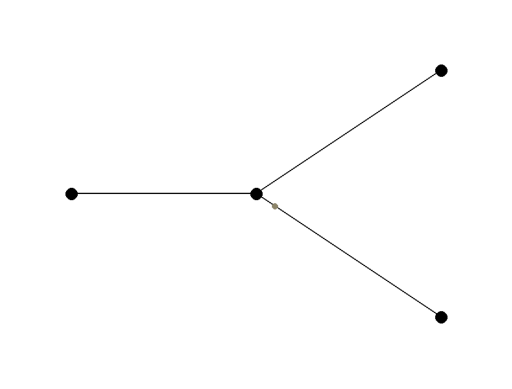

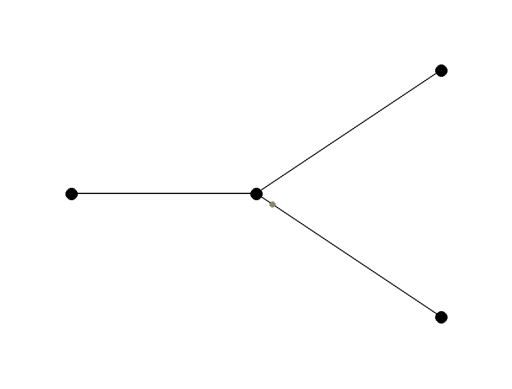

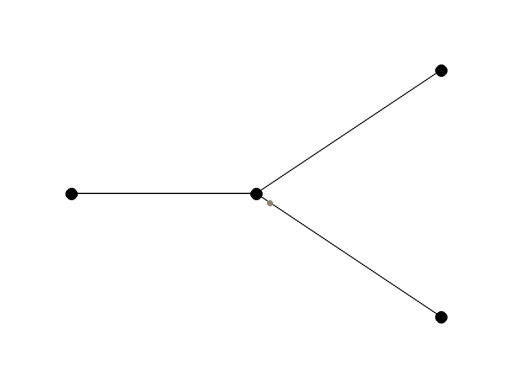

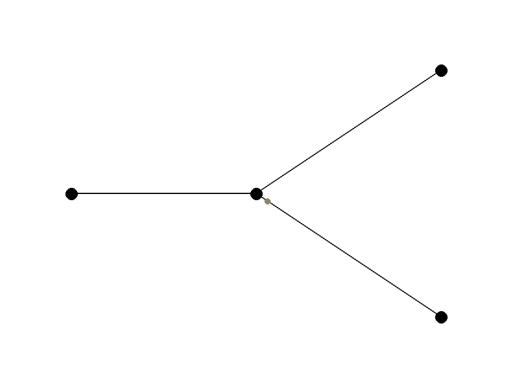

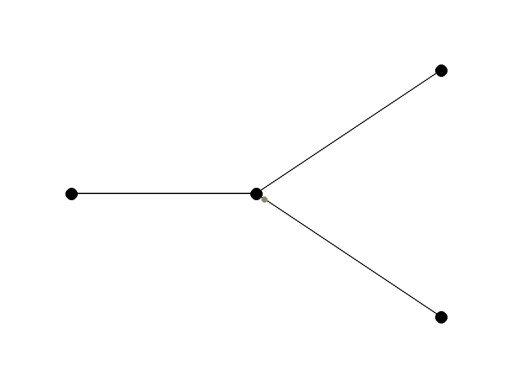

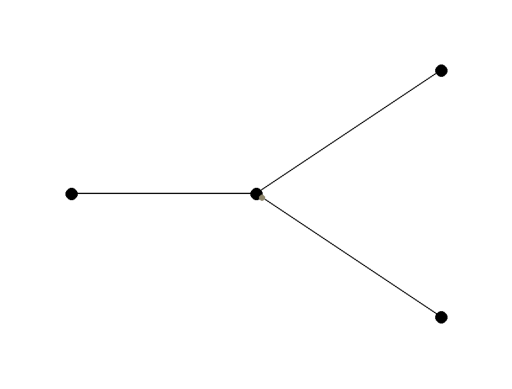

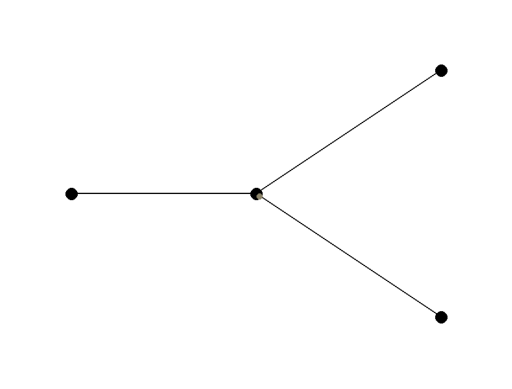

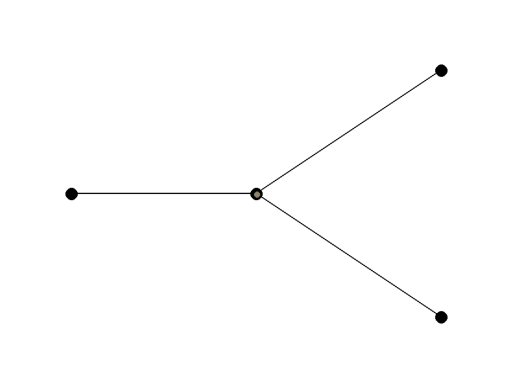

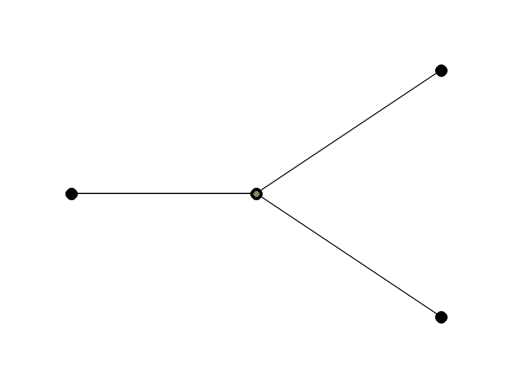

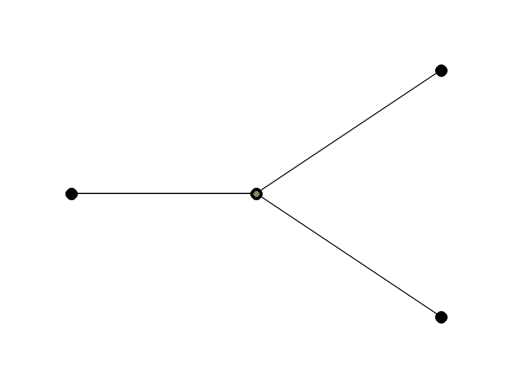

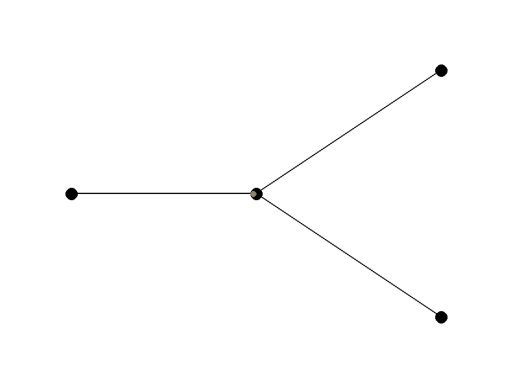

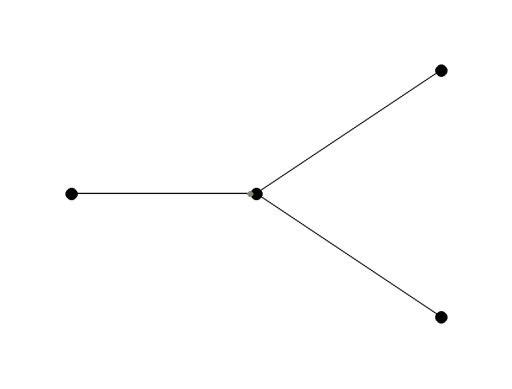

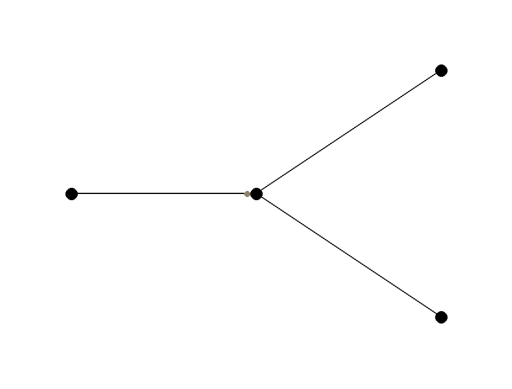

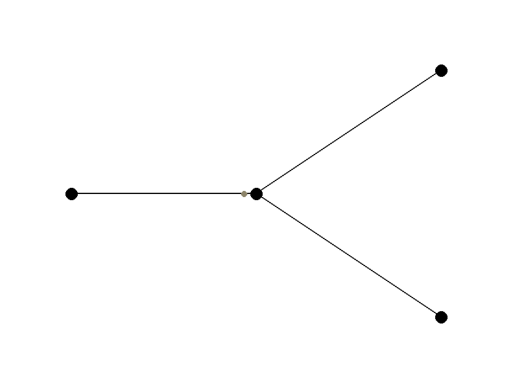

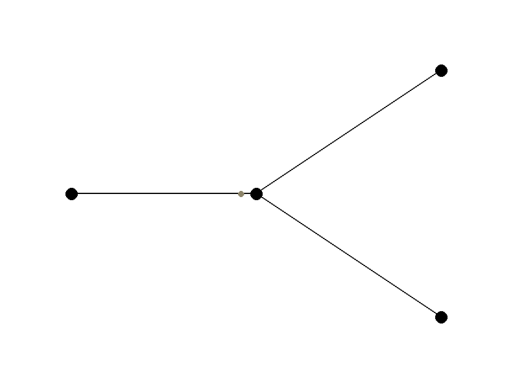

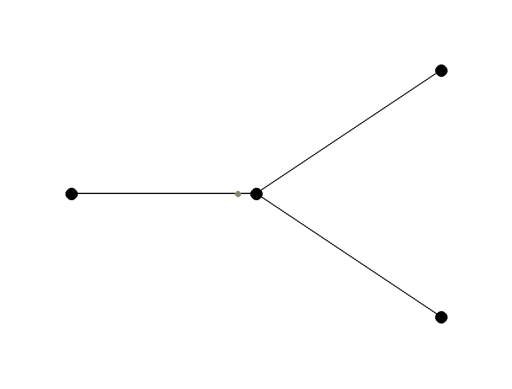

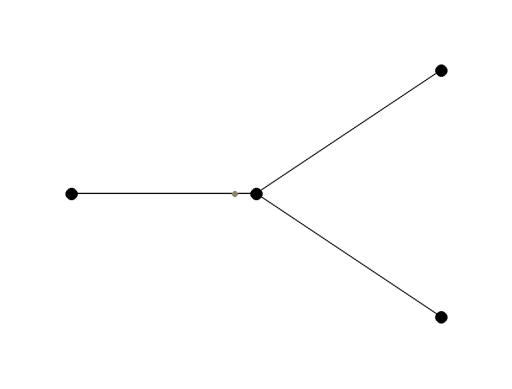

In [15]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from typing import List, Tuple

# Set up a virtual display for pygame in Colab
display = Display(visible=0, size=(800, 600))
display.start()

class MovingObject:
    def __init__(self, x: float, y: float, speed: float, target: Tuple[float, float]):
        self.x = x
        self.y = y
        self.speed = speed
        self.target = target
        self.reached = False
        self.color = (np.random.randint(50, 255), np.random.randint(50, 255), np.random.randint(50, 255))

    def move(self):
        if self.reached:
            return

        dx = self.target[0] - self.x
        dy = self.target[1] - self.y
        distance = np.sqrt(dx**2 + dy**2)

        if distance < self.speed:
            self.x = self.target[0]
            self.y = self.target[1]
            self.reached = True
        else:
            self.x += (dx/distance) * self.speed
            self.y += (dy/distance) * self.speed

class TrafficSimulation:
    def __init__(self, width: int = 800, height: int = 600):
        pygame.init()
        self.width = width
        self.height = height
        self.screen = pygame.Surface((width, height))  # Use Surface instead of display mode

        self.nodes = {
            "orig1": (100, 100),
            "orig2": (100, 500),
            "merge": (400, 300),
            "dest": (700, 300)
        }

        self.objects: List[MovingObject] = []
        self.clock = pygame.time.Clock()

    def add_object(self, start: str, end: str, speed: float):
        start_pos = self.nodes[start]
        end_pos = self.nodes[end]
        self.objects.append(MovingObject(start_pos[0], start_pos[1], speed, end_pos))

    def capture_frame(self):
        """Capture the Pygame screen and display it in Colab."""
        img_array = pygame.surfarray.array3d(self.screen)
        img_array = np.rot90(img_array)  # Rotate for correct orientation
        img_array = np.flip(img_array, axis=1)  # Flip for correct alignment

        plt.imshow(img_array)
        plt.axis("off")
        plt.show()

    def run(self, max_frames=200):
        spawn_timer = 0
        for frame in range(max_frames):  # Limit the number of frames to avoid infinite loop in Colab
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    return

            # Spawn new objects periodically
            spawn_timer += 1
            if spawn_timer >= 120:  # Spawn every 120 frames
                spawn_timer = 0
                start_node = "orig1" if np.random.random() < 0.5 else "orig2"
                self.add_object(start_node, "merge", 5)

            # Update object positions
            for obj in self.objects:
                if not obj.reached:
                    obj.move()
                elif obj.target == self.nodes["merge"]:
                    obj.target = self.nodes["dest"]
                    obj.reached = False

            # Remove objects that have reached final destination
            self.objects = [obj for obj in self.objects if not (obj.reached and obj.target == self.nodes["dest"])]

            # Draw
            self.screen.fill((255, 255, 255))

            # Draw nodes
            for pos in self.nodes.values():
                pygame.draw.circle(self.screen, (0, 0, 0), pos, 10)

            # Draw links
            pygame.draw.line(self.screen, (0, 0, 0), self.nodes["orig1"], self.nodes["merge"], 2)
            pygame.draw.line(self.screen, (0, 0, 0), self.nodes["orig2"], self.nodes["merge"], 2)
            pygame.draw.line(self.screen, (0, 0, 0), self.nodes["merge"], self.nodes["dest"], 2)

            # Draw objects
            for obj in self.objects:
                pygame.draw.circle(self.screen, obj.color, (int(obj.x), int(obj.y)), 5)

            # Capture frame to display in Colab
            self.capture_frame()

            self.clock.tick(30)  # Reduce FPS to 30 for smoother Colab execution

        pygame.quit()

if __name__ == "__main__":
    sim = TrafficSimulation()
    sim.run()
